大众点评奶茶店铺数据分析报告 符洪瑞

1. 数据导入

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

original_data_bj= pd.read_csv(r"C:\Users\21515\Desktop\杂物\Library\商业应用分析\项目数据\北京大众点评奶茶店铺数据.csv")
original_data_sh= pd.read_csv(r"C:\Users\21515\Desktop\杂物\Library\商业应用分析\项目数据\上海大众点评奶茶店铺数据.csv")
data = original_data_bj.copy()
data_sh= original_data_sh.copy()

2. 数据清洗

In [2]:
# 将xx：00-xx：00格式的营业时间转换为以小时为单位的数据
def convert_to_hours(time_str):
    if pd.isna(time_str) or time_str == "暂无":
        return np.nan
    if "-" in time_str:
        start, end = time_str.split("-")
        start_hour, start_minute = map(int, start.split(":"))
        end_hour, end_minute = map(int, end.split(":"))
        start_in_hours = start_hour + start_minute / 60
        end_in_hours = end_hour + end_minute / 60
        return end_in_hours - start_in_hours
    try:
        float(time_str)
        return time_str
    except ValueError:
        return np.nan
data["营业时间"] = data["营业时间"].apply(convert_to_hours)
data_sh["营业时间"] = data_sh["营业时间"].apply(convert_to_hours)
if not isinstance(data, pd.DataFrame):
    data = pd.DataFrame({"Answer": [data]})
data['营业时间'] = pd.to_numeric(data['营业时间'], errors='coerce')
data = data.fillna({'营业时间': data['营业时间'].median()})
if not isinstance(data_sh, pd.DataFrame):
    data_sh = pd.DataFrame({"Answer": [data_sh]})
data_sh['营业时间'] = pd.to_numeric(data_sh['营业时间'], errors='coerce')
data_sh = data_sh.fillna({'营业时间': data_sh['营业时间'].median()})


In [3]:
# 提取店铺名括号前的品牌名
def extract_brand(name):
    if '(' in name:
        return name.split('(')[0].strip()
    return name.strip()

# 对北京数据处理
data['品牌名'] = data['店铺名'].apply(extract_brand)
brand_counts = data['品牌名'].value_counts()
print(brand_counts)
data['品牌效应'] = data['品牌名'].map(brand_counts)

# 对上海数据处理
data_sh['品牌名'] = data_sh['店铺名称'].apply(extract_brand)
brand_counts_sh = data_sh['品牌名'].value_counts()
print(brand_counts_sh)
data_sh['品牌效应'] = data_sh['品牌名'].map(brand_counts_sh)

品牌名
蜜雪冰城          42
CHAGEE霸王茶姬    39
茉莉奶白          34
喜茶            26
茶百道           19
              ..
李茶的茶           1
甄果初酸奶水果捞       1
风亭叙新中式茶饮       1
七天牧场鲜奶吧        1
益禾堂            1
Name: count, Length: 89, dtype: int64
品牌名
茉莉奶白                    39
KOI Thé                  9
CHAGEE霸王茶姬               9
喜茶                       8
阿嬷手作                     6
裕莲茶楼                     6
BONJOUR本就                6
LELECHA乐乐茶               6
阿狗手打·手作                  5
OT另茶                     5
THE MATCHA TOKYO今抹京茶     4
麦记牛奶公司                   4
淡马茶坊                     4
去茶山                      2
T9tea                    2
日尝                       2
裕蘭茶楼                     2
Uniboba优尼波巴              2
cococean椰子水              2
永民手作                     2
tea'stone                2
麥吉machi machi            2
KOI PLUS                 2
木叒茶屋                     1
裕蘭茶楼mini                 1
LA FRAICHEUR.水果工作室       1
爷爷不泡茶 NOYEYENOTEA        1
哈茶福                      1
梧桐茶室       

3. 描述性统计分析

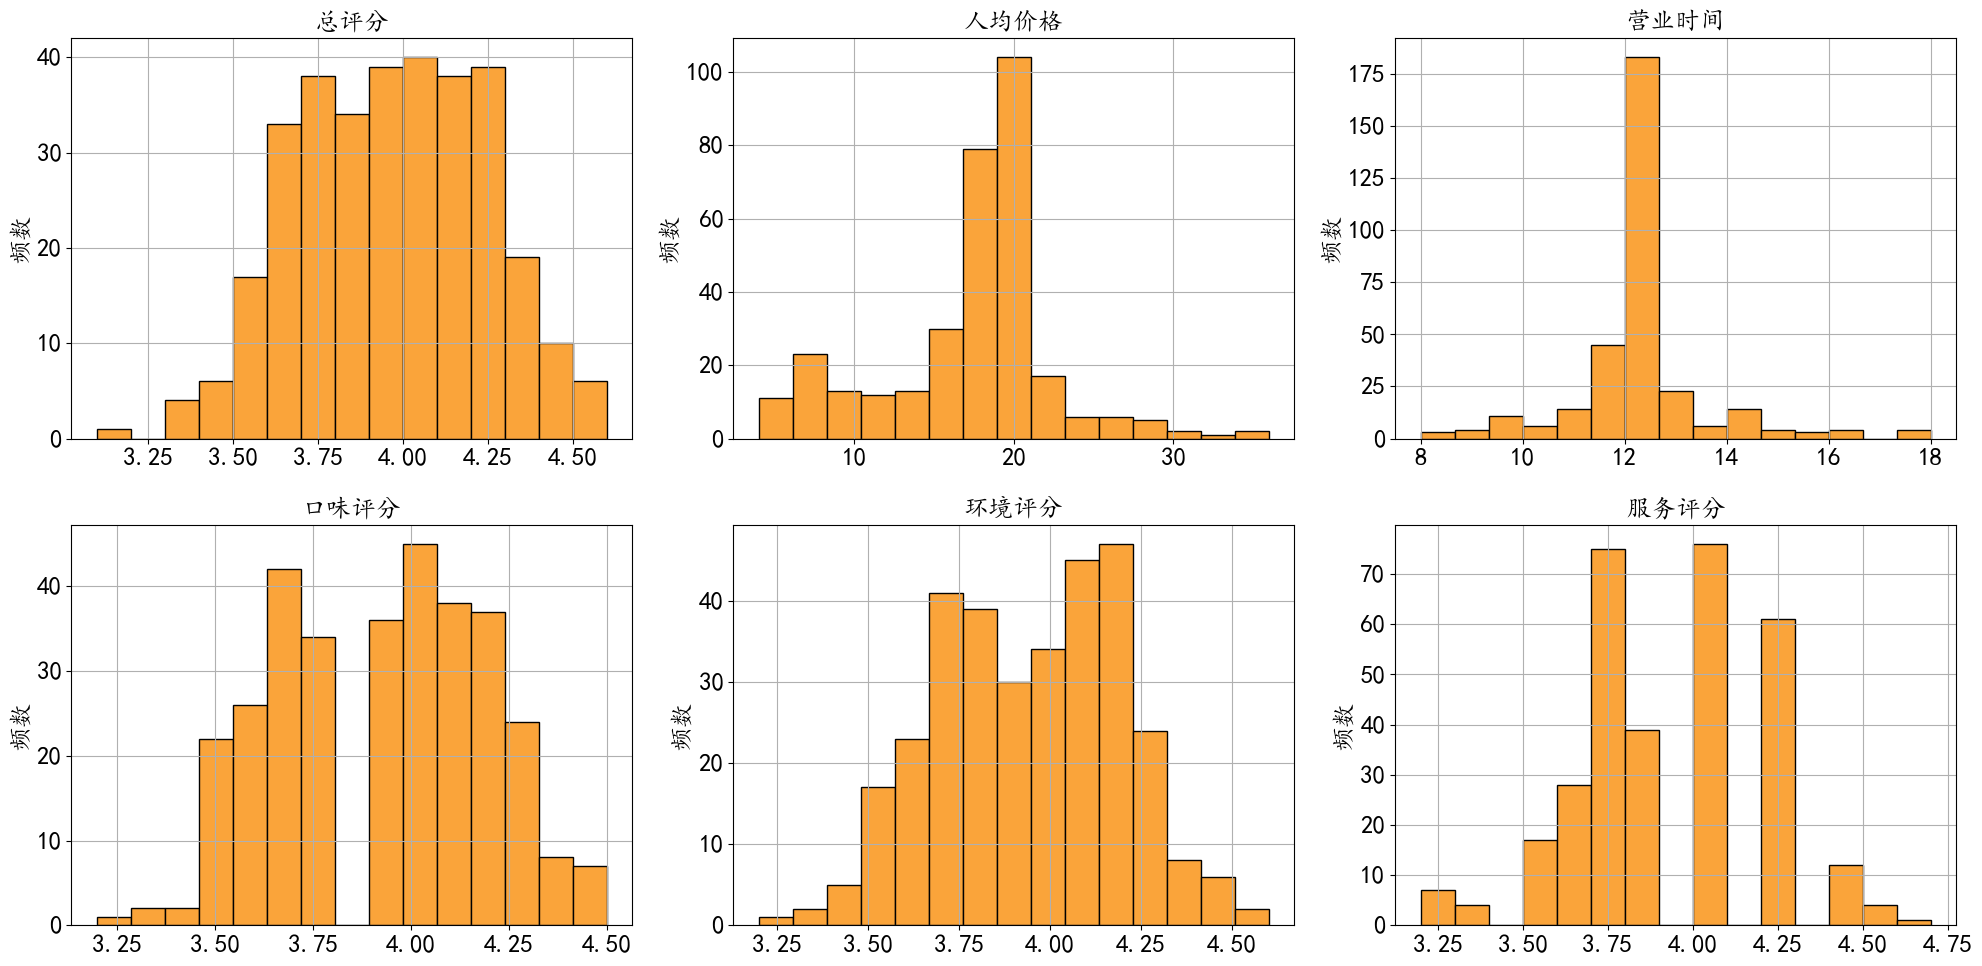

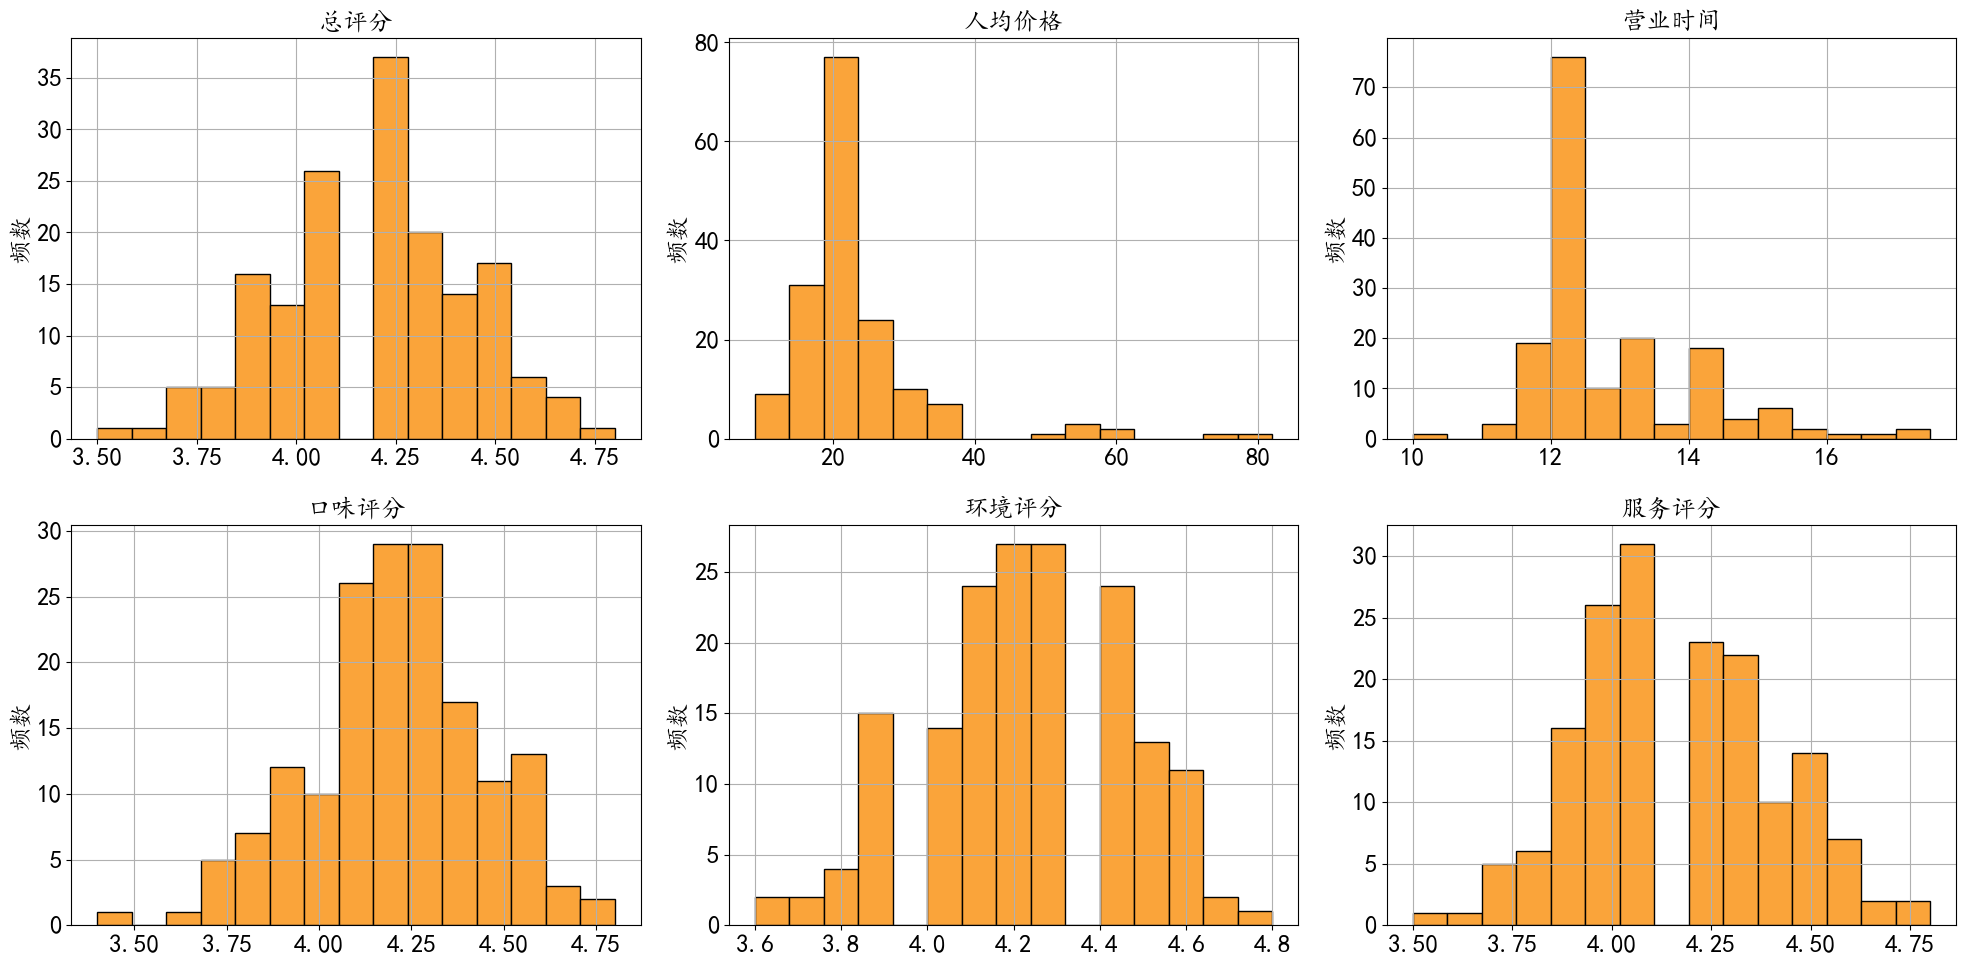

In [4]:
output = r"C:\Users\21515\Desktop\杂物\Library\商业应用分析\项目数据\数据分析报告"

plt.rcParams['font.sans-serif'] = ['KaiTi']
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.size'] = 18
plt.rcParams['axes.titlesize'] = 18

# 六个分布较为均衡的变量的直方图
his_col=['总评分','人均价格','营业时间','口味评分','环境评分','服务评分']
fig, ax = plt.subplots(2, 3, figsize=(20, 10))
axes = ax.flatten()

for i, col in enumerate(his_col):
    data.hist(column=col, ax=axes[i], bins=15,color="#FAA43A",edgecolor='black')
    axes[i].set_title(col)
    axes[i].set_ylabel('频数')
plt.tight_layout()
plt.savefig(os.path.join(output, "六变量直方图.png"), dpi=300, bbox_inches='tight')
plt.show()
# 对上海数据 data_sh 画六个变量的直方图
fig_sh, ax_sh = plt.subplots(2, 3, figsize=(20, 10))
axes_sh = ax_sh.flatten()

for i, col in enumerate(his_col):
    data_sh.hist(column=col, ax=axes_sh[i], bins=15, color="#FAA43A", edgecolor='black')
    axes_sh[i].set_title(col)
    axes_sh[i].set_ylabel('频数')
plt.tight_layout()
plt.savefig(os.path.join(output, "六变量直方图_上海.png"), dpi=300, bbox_inches='tight')
plt.show()

几个数值变量的分布基本上都比较均衡，不需要做什么调整

上海的人均价格和营业时间呈现出轻微右偏

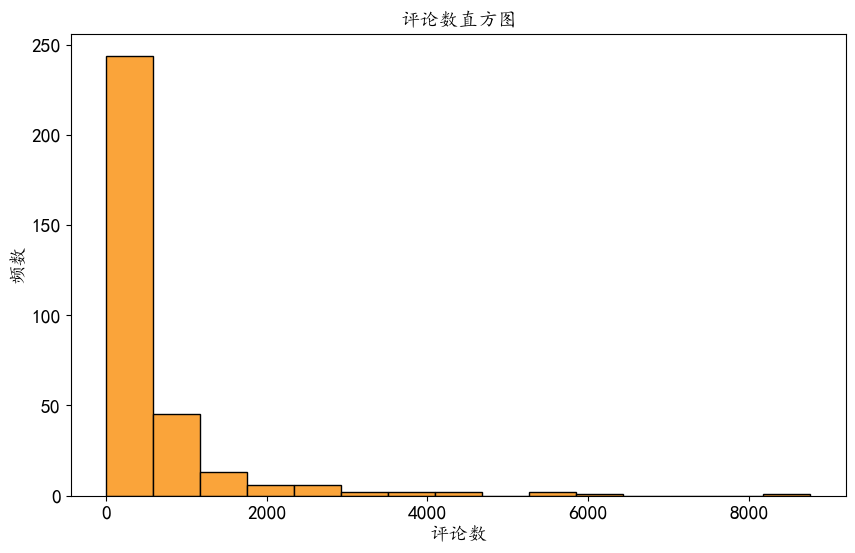

In [5]:
# 原始的评论数分布
plt.figure(figsize=(10, 6))
plt.rcParams['font.size'] = 14
plt.rcParams['axes.titlesize'] = 14
plt.title('评论数直方图')
plt.hist(data['评论数'], bins=15, color="#FAA43A", edgecolor='black')
plt.xlabel('评论数')
plt.ylabel('频数')
plt.savefig(os.path.join(output, "评论数直方图.png"), dpi=300, bbox_inches='tight')
plt.show()

评论数呈现极端右偏分布，做一下对数变换看看

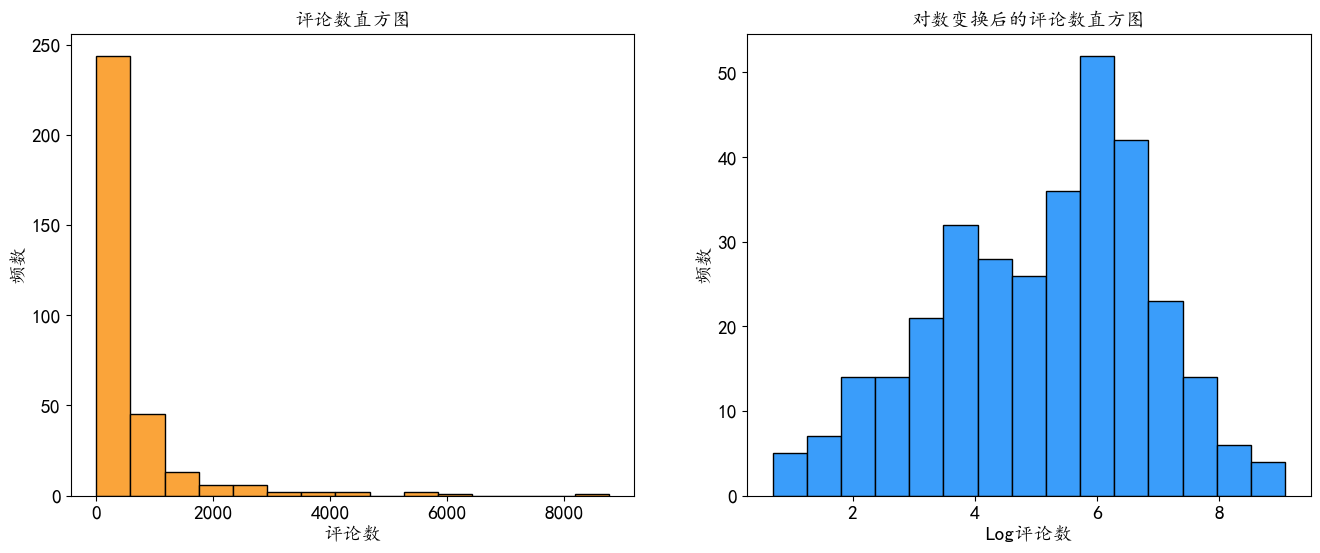

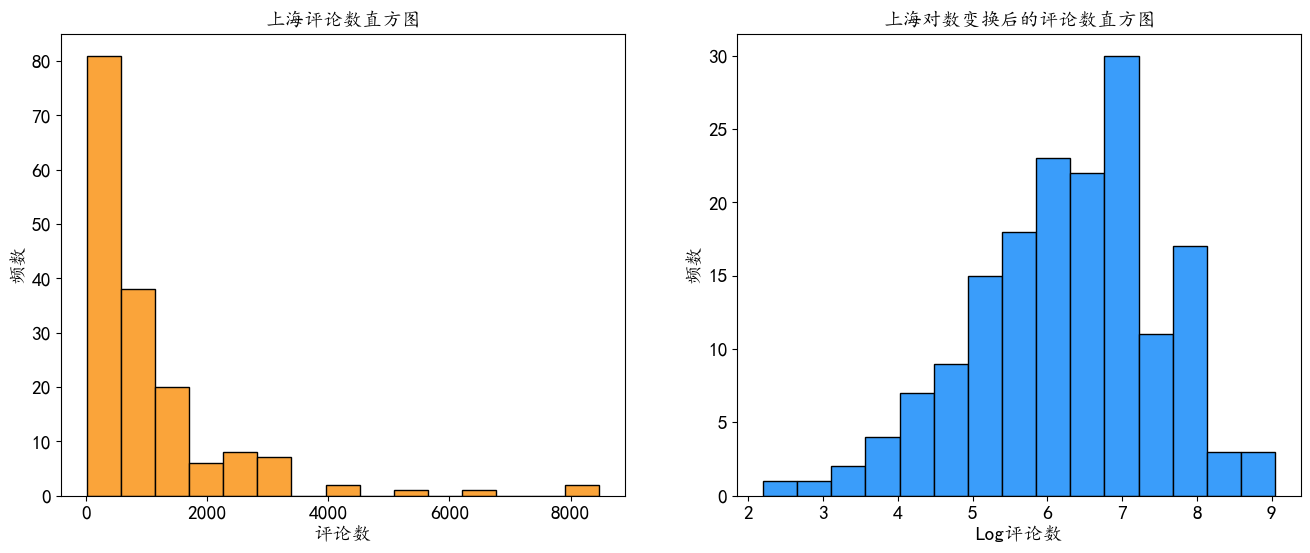

In [6]:
# 原始的评论数分布与对数变换之后的评论数分布
fig,ax = plt.subplots(1, 2, figsize=(16, 6))
ax[0].hist(data['评论数'], bins=15, color="#FAA43A", edgecolor='black')
ax[0].set_xlabel('评论数')
ax[0].set_ylabel('频数')
ax[0].set_title('评论数直方图')
data['Log评论数'] = np.log1p(data['评论数'])
ax[1].hist(data['Log评论数'], bins=15, color="#3A9DFA", edgecolor='black')
ax[1].set_xlabel('Log评论数')
ax[1].set_ylabel('频数')
ax[1].set_title('对数变换后的评论数直方图')
plt.savefig(os.path.join(output, "评论数直方图.png"), dpi=300, bbox_inches='tight')
plt.show()
# 对上海数据进行评论数的对数变换并画图
fig_sh, ax_sh = plt.subplots(1, 2, figsize=(16, 6))
ax_sh[0].hist(data_sh['评论数'], bins=15, color="#FAA43A", edgecolor='black')
ax_sh[0].set_xlabel('评论数')
ax_sh[0].set_ylabel('频数')
ax_sh[0].set_title('上海评论数直方图')
data_sh['Log评论数'] = np.log1p(data_sh['评论数'])
ax_sh[1].hist(data_sh['Log评论数'], bins=15, color="#3A9DFA", edgecolor='black')
ax_sh[1].set_xlabel('Log评论数')
ax_sh[1].set_ylabel('频数')
ax_sh[1].set_title('上海对数变换后的评论数直方图')
plt.savefig(os.path.join(output, "评论数直方图_上海.png"), dpi=300, bbox_inches='tight')
plt.show()

对数变换之后的评论数就从极端右偏的分布变成了较为均衡的分布

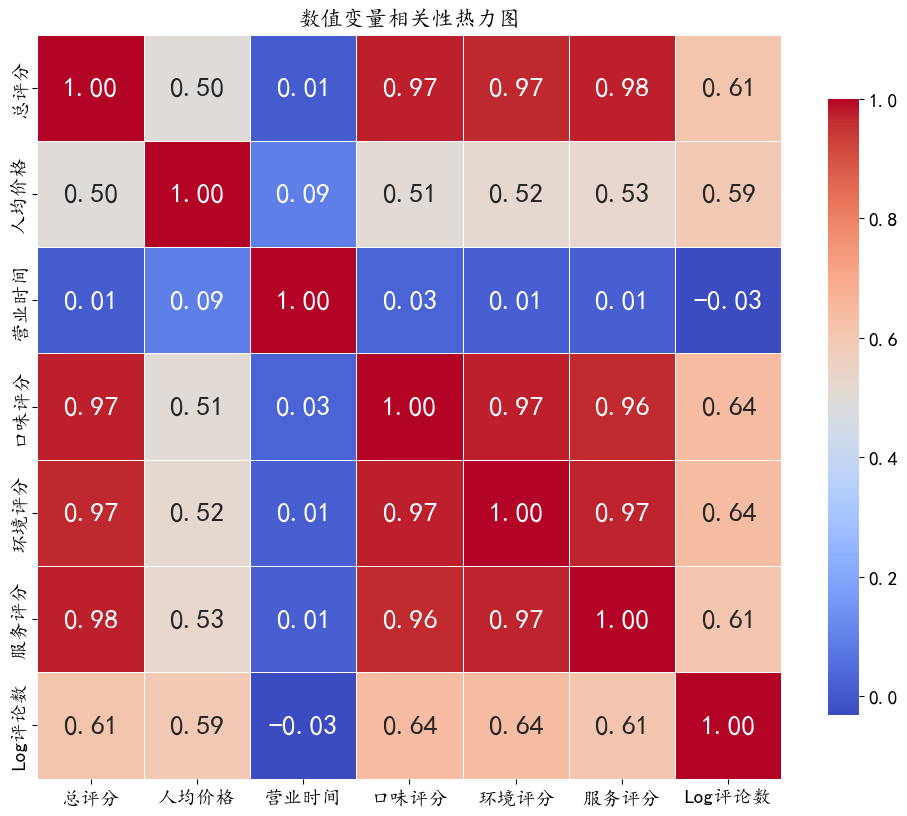

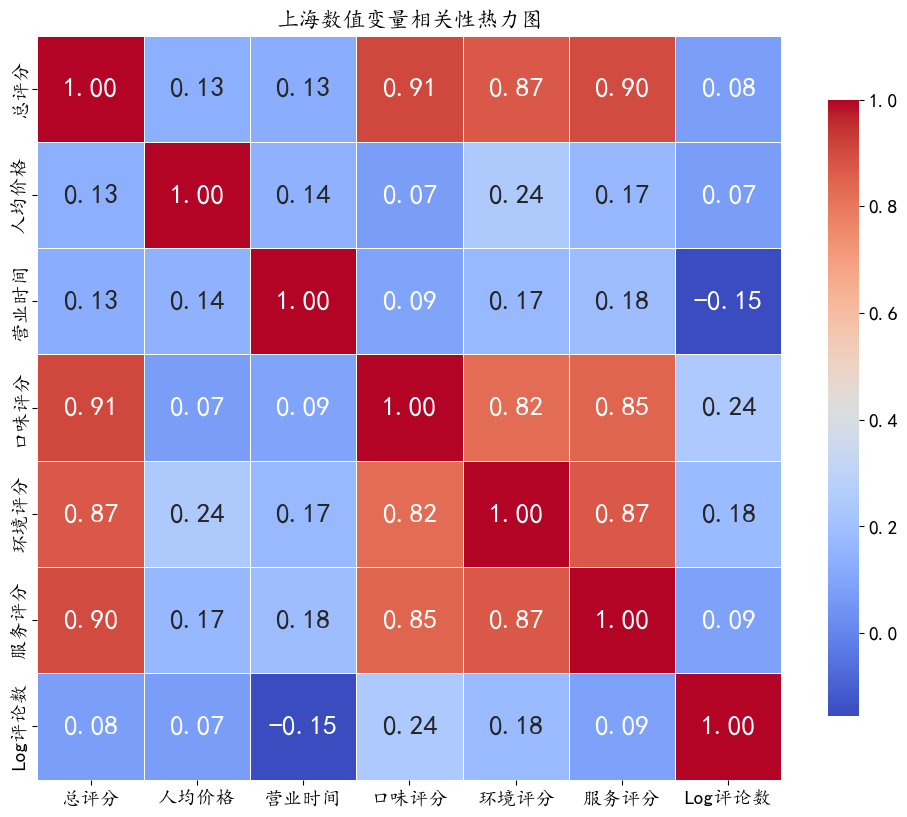

In [7]:
# 多变量之间的相关性分析
numeric_cols = ['总评分', '人均价格', '营业时间', '口味评分', '环境评分', '服务评分', 'Log评论数']
corr_matrix=data[numeric_cols].corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, linecolor='white', square=True, cbar_kws={"shrink": .8}, annot_kws={"size": 20})
plt.title('数值变量相关性热力图',fontsize=16)
plt.savefig(os.path.join(output, "数值变量相关性热力图.png"), dpi=300, bbox_inches='tight')
plt.show()
# 对上海数据进行多变量相关性分析
numeric_cols_sh = ['总评分', '人均价格', '营业时间', '口味评分', '环境评分', '服务评分', 'Log评论数']
corr_matrix_sh = data_sh[numeric_cols_sh].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix_sh, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, linecolor='white', square=True, cbar_kws={"shrink": .8}, annot_kws={"size": 20})
plt.title('上海数值变量相关性热力图', fontsize=16)
plt.savefig(os.path.join(output, "上海数值变量相关性热力图.png"), dpi=300, bbox_inches='tight')
plt.show()

北京：可以看出，对数评论数与人均价格、总评分、口味评分、环境评分、服务评分之间都存在着较强的正相关性，但是和营业时间之间只存在极其弱的负相关性；

同时，总评分与三个细分评分之间的相关性极强，如果都放入回归模型的话会导致模型出现很强的多重共线性，因此后文将使用总评分来代替另外三个细分评分；

总评分与人均价格之间也存在着中等的正相关性，后续一起都放入模型中要注意VIF检验；

上海：与北京不同，三个评分细分项与总评分之间存在的相关性没有那么强，并且对数评论数和各变量之间的相关性相当弱？这是为什么？

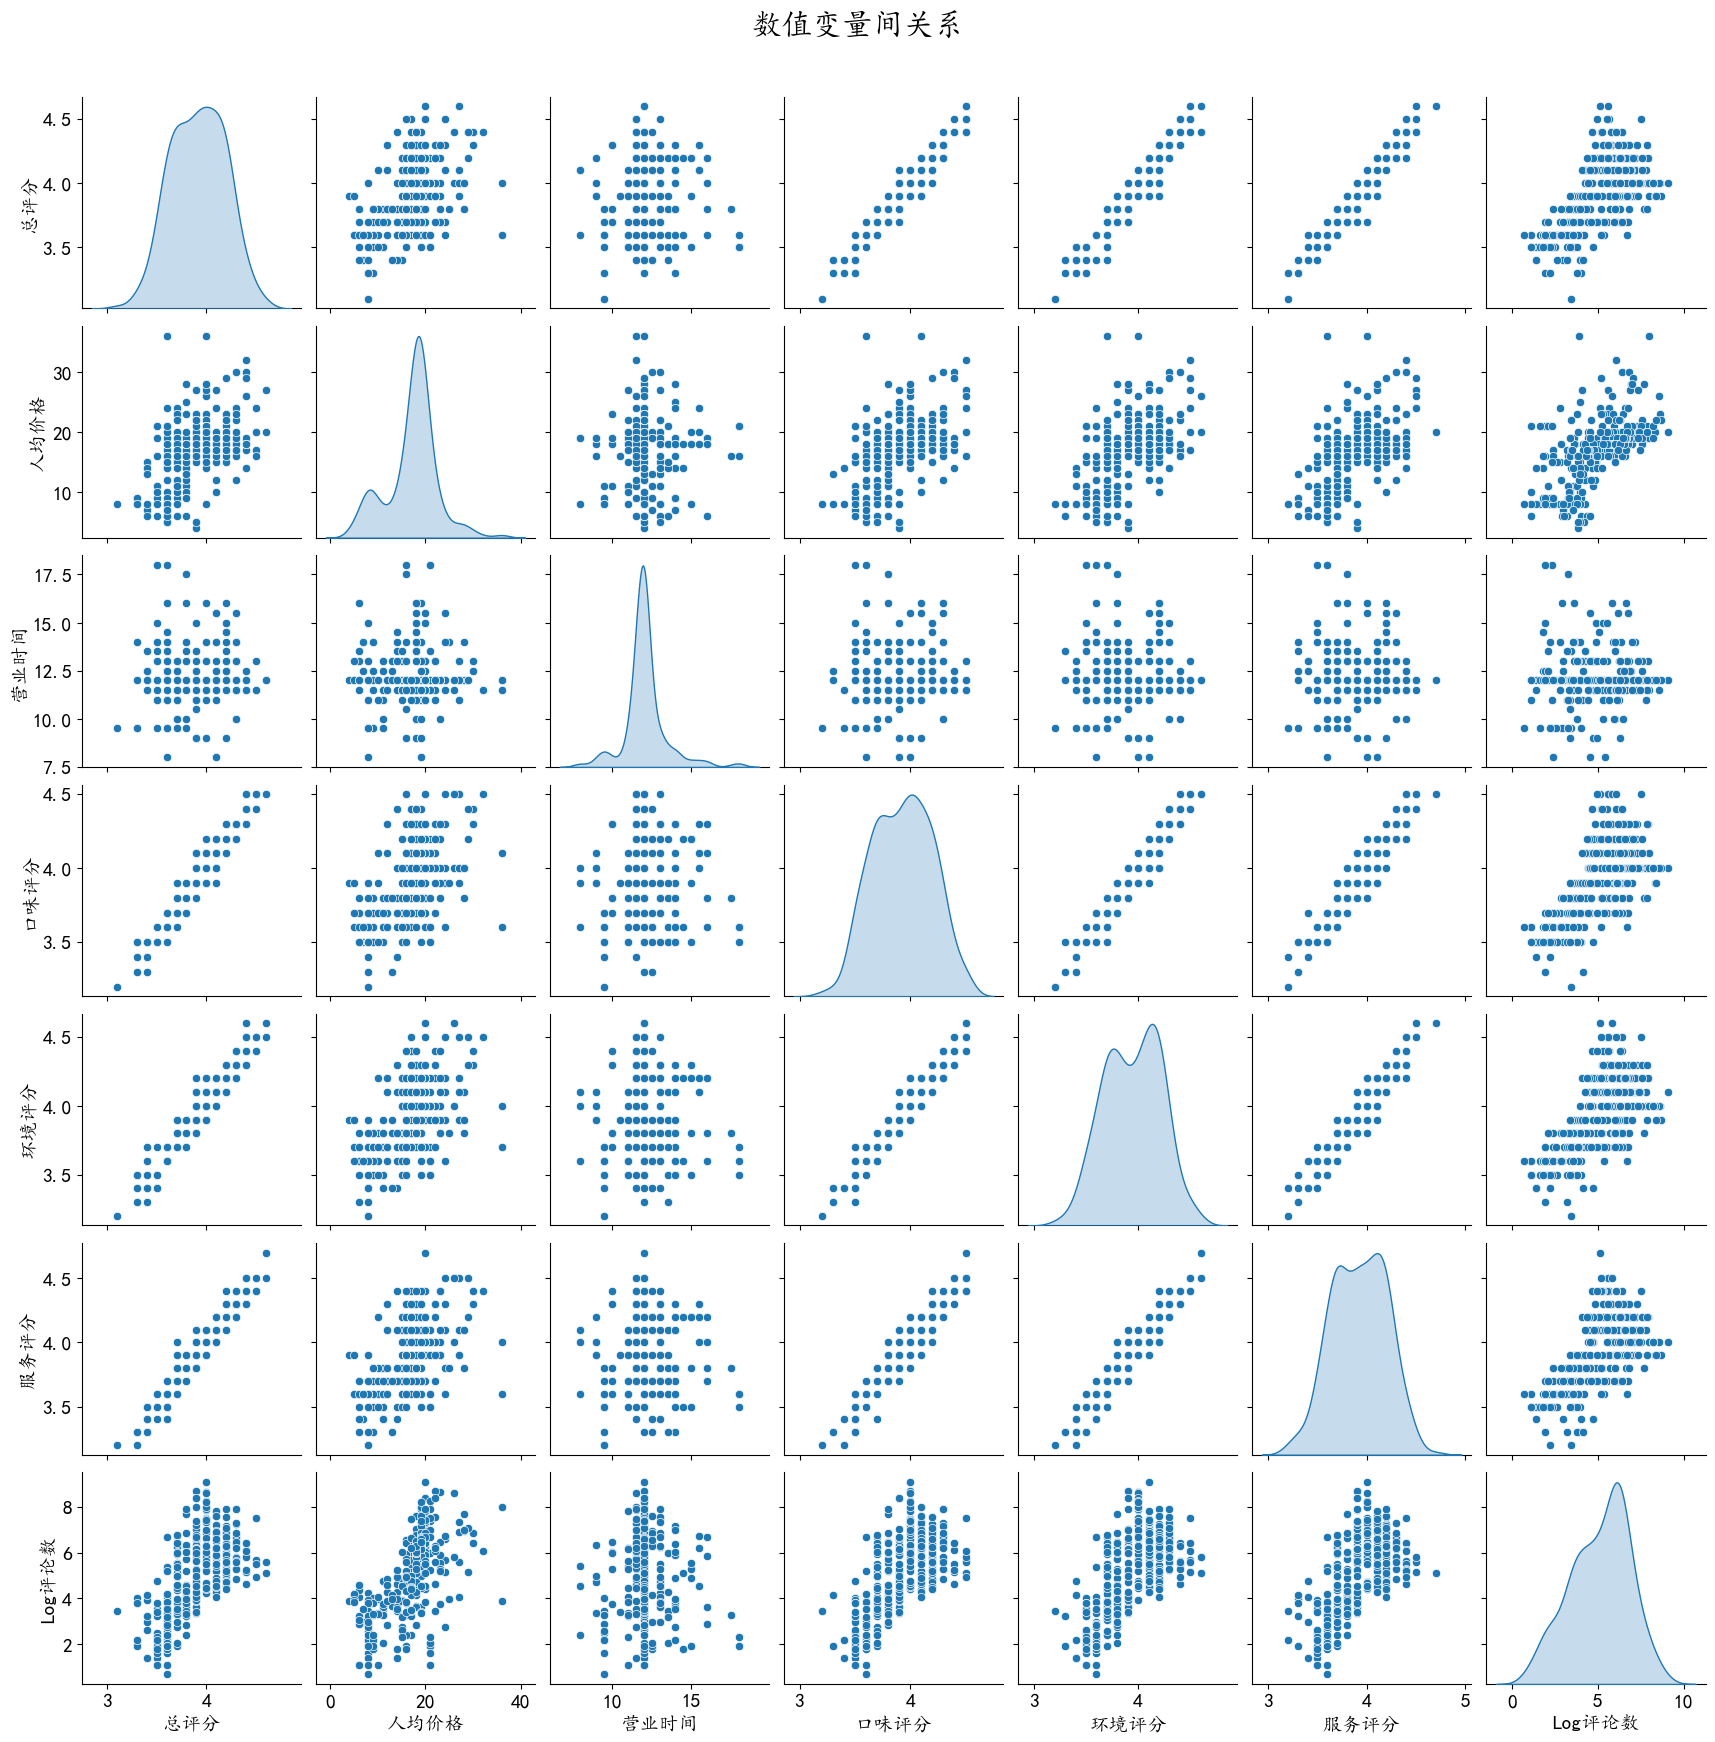

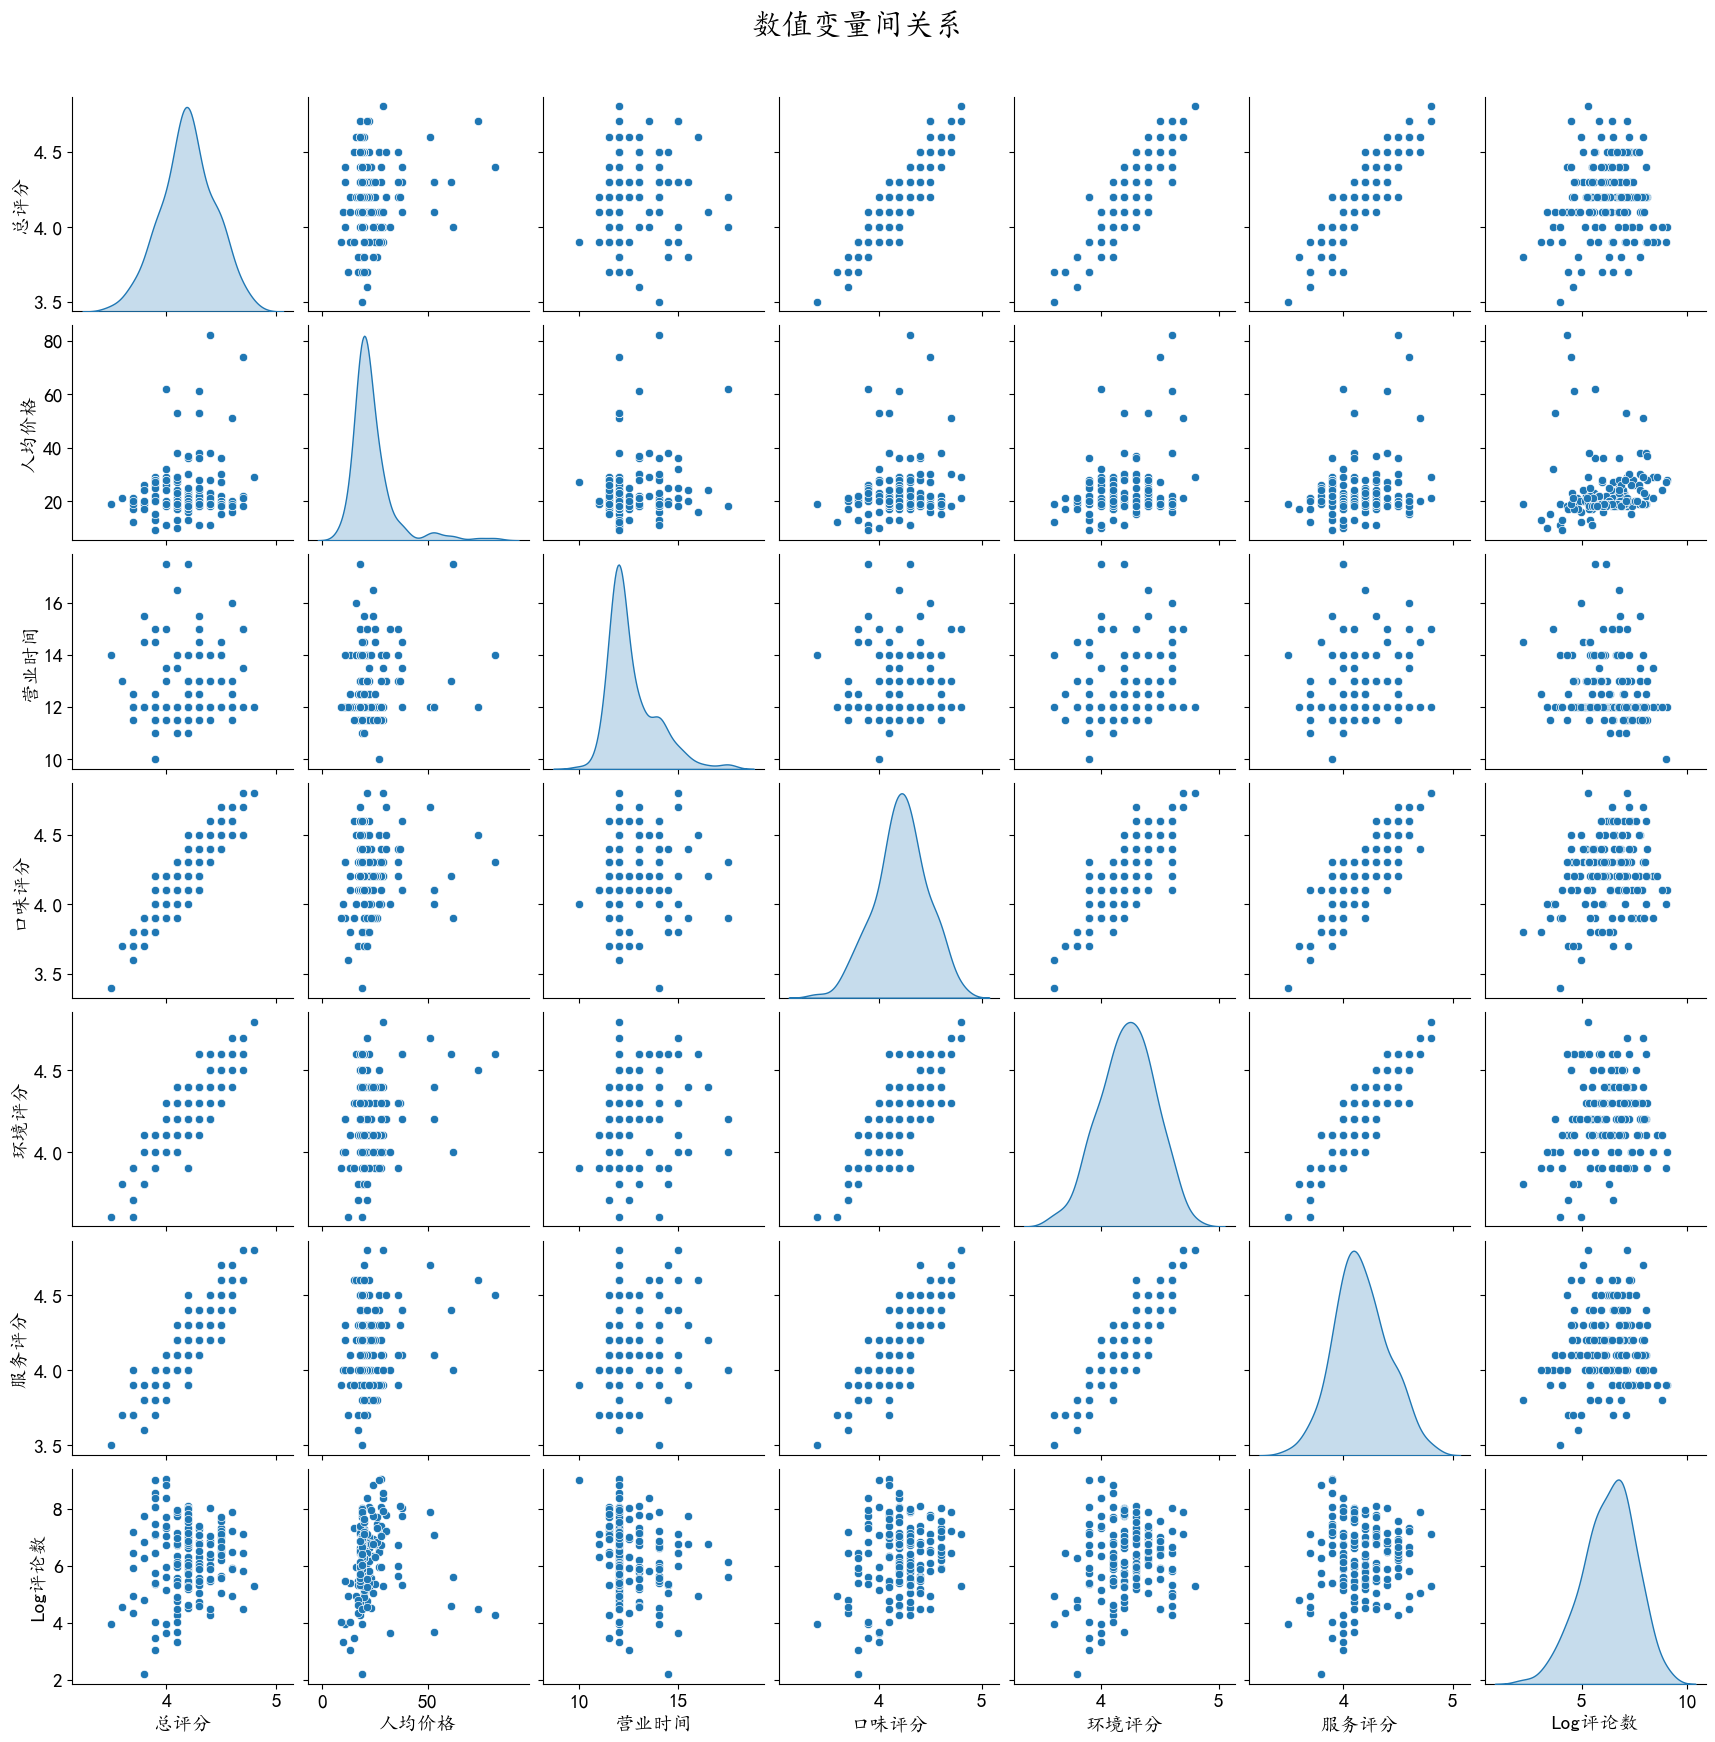

In [8]:
# 多变量之间的散点图
numeric_cols = ['总评分', '人均价格', '营业时间', '口味评分', '环境评分', '服务评分', 'Log评论数']
grid = sns.pairplot(data[numeric_cols], diag_kind='kde', markers='o')
grid.fig.suptitle("数值变量间关系", fontsize=22, y=1.00)
plt.subplots_adjust(top=0.95)
plt.savefig(os.path.join(output, "数值变量间关系.png"), dpi=300, bbox_inches='tight')
plt.show()

grid = sns.pairplot(data_sh[numeric_cols], diag_kind='kde', markers='o')
grid.fig.suptitle("数值变量间关系", fontsize=22, y=1.00)
plt.subplots_adjust(top=0.95)
plt.savefig(os.path.join(output, "上海数值变量间关系.png"), dpi=300, bbox_inches='tight')
plt.show()

可以看出，对数评论数与总评分、人均价格之间均存在着一定的线性关系（看着也有点像指数，可以后续检验一下）

C:\Users\21515\AppData\Local\Temp\ipykernel_24864\2930867446.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='是否连锁',y='总评分',data=data,palette='Set2')
C:\Users\21515\AppData\Local\Temp\ipykernel_24864\2930867446.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='有无团购套餐',y='总评分',data=data,palette='Set2')


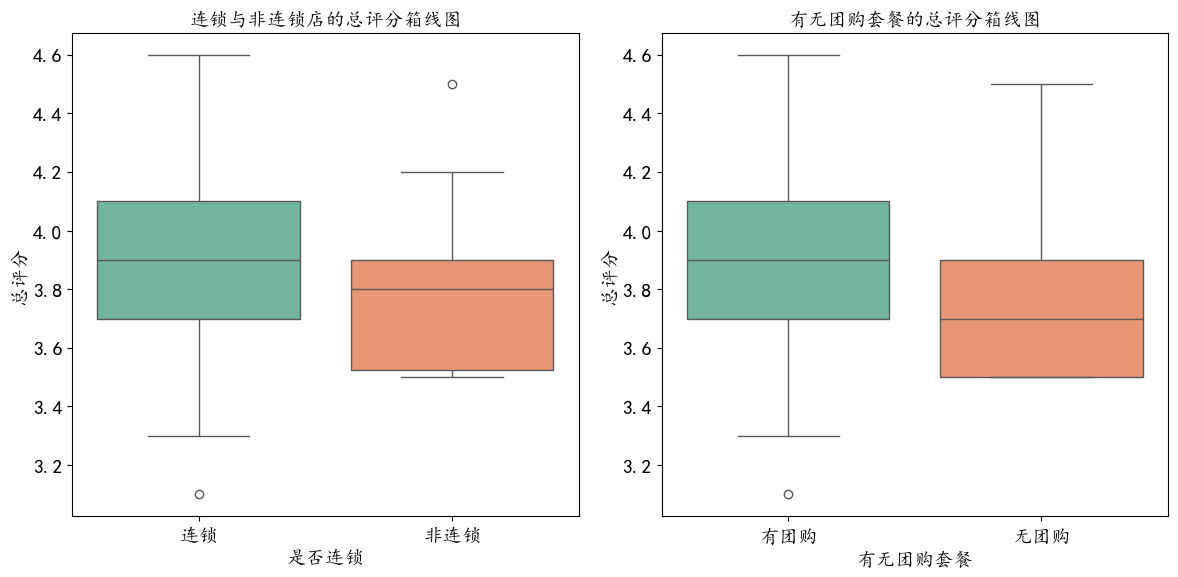

C:\Users\21515\AppData\Local\Temp\ipykernel_24864\2930867446.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='是否连锁',y='总评分',data=data_sh,palette='Set2')
C:\Users\21515\AppData\Local\Temp\ipykernel_24864\2930867446.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='有无团购套餐',y='总评分',data=data_sh,palette='Set2')


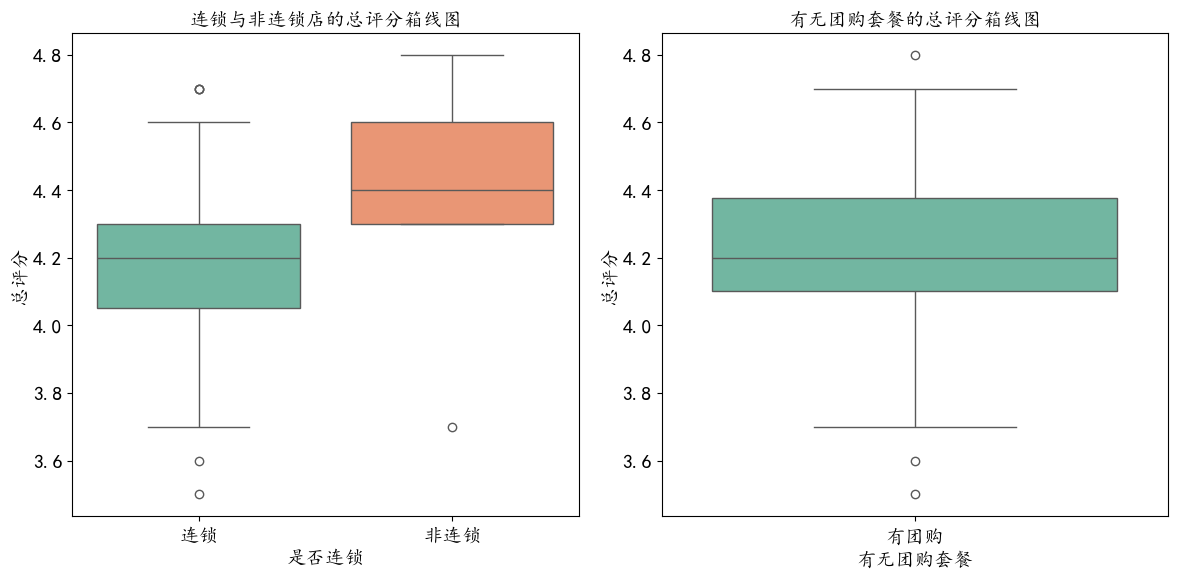

In [9]:
# 总评分的分组箱线图
plt.figure(figsize=(12, 6))

plt.subplot(1,2,1)
sns.boxplot(x='是否连锁',y='总评分',data=data,palette='Set2')
plt.title('连锁与非连锁店的总评分箱线图')
plt.xlabel('是否连锁')
plt.ylabel('总评分')

plt.subplot(1,2,2)
sns.boxplot(x='有无团购套餐',y='总评分',data=data,palette='Set2')
plt.title('有无团购套餐的总评分箱线图')
plt.xlabel('有无团购套餐')
plt.ylabel('总评分')
plt.tight_layout()
plt.savefig(os.path.join(output, "总评分分组箱线图.png"), dpi=300, bbox_inches='tight')
plt.show()

# 总评分的分组箱线图
plt.figure(figsize=(12, 6))

plt.subplot(1,2,1)
sns.boxplot(x='是否连锁',y='总评分',data=data_sh,palette='Set2')
plt.title('连锁与非连锁店的总评分箱线图')
plt.xlabel('是否连锁')
plt.ylabel('总评分')

plt.subplot(1,2,2)
sns.boxplot(x='有无团购套餐',y='总评分',data=data_sh,palette='Set2')
plt.title('有无团购套餐的总评分箱线图')
plt.xlabel('有无团购套餐')
plt.ylabel('总评分')
plt.tight_layout()
plt.savefig(os.path.join(output, "上海总评分分组箱线图.png"), dpi=300, bbox_inches='tight')
plt.show()

从中可以看出，数据集中的两个分类变量：“是否连锁”与“有无团购”对于店铺的总评分都产生了一定的正面影响

上海的非连锁店铺反而比连锁店铺的总评分更高

C:\Users\21515\AppData\Local\Temp\ipykernel_24864\3219850300.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='是否连锁',y='Log评论数',data=data,palette='Set3')
C:\Users\21515\AppData\Local\Temp\ipykernel_24864\3219850300.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='有无团购套餐',y='Log评论数',data=data,palette='Set3')


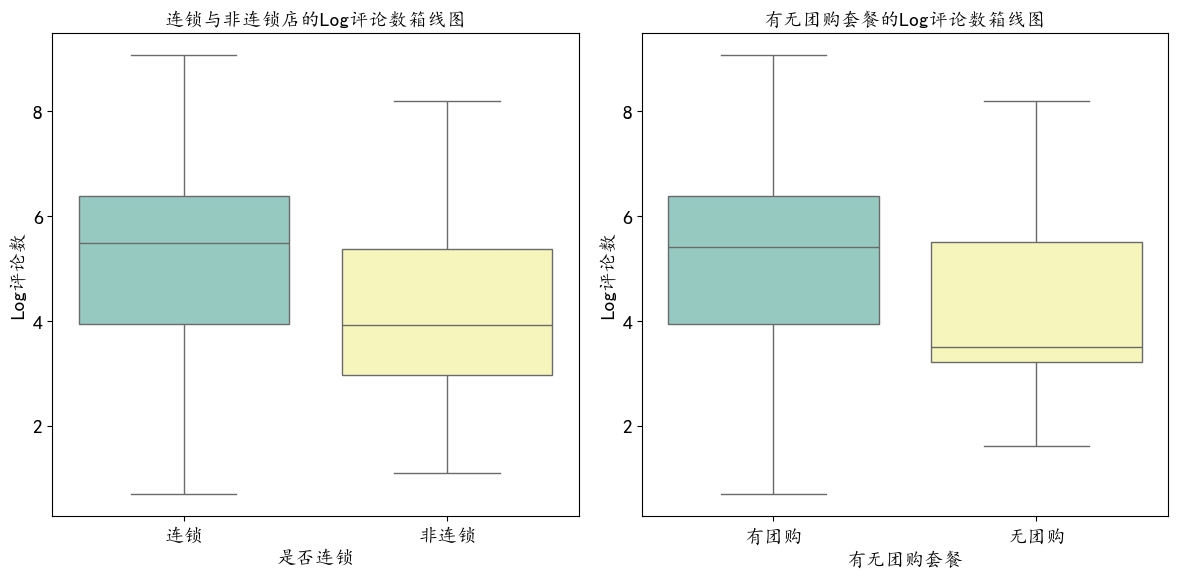

C:\Users\21515\AppData\Local\Temp\ipykernel_24864\3219850300.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='是否连锁',y='Log评论数',data=data_sh,palette='Set3')
C:\Users\21515\AppData\Local\Temp\ipykernel_24864\3219850300.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='有无团购套餐',y='Log评论数',data=data_sh,palette='Set3')


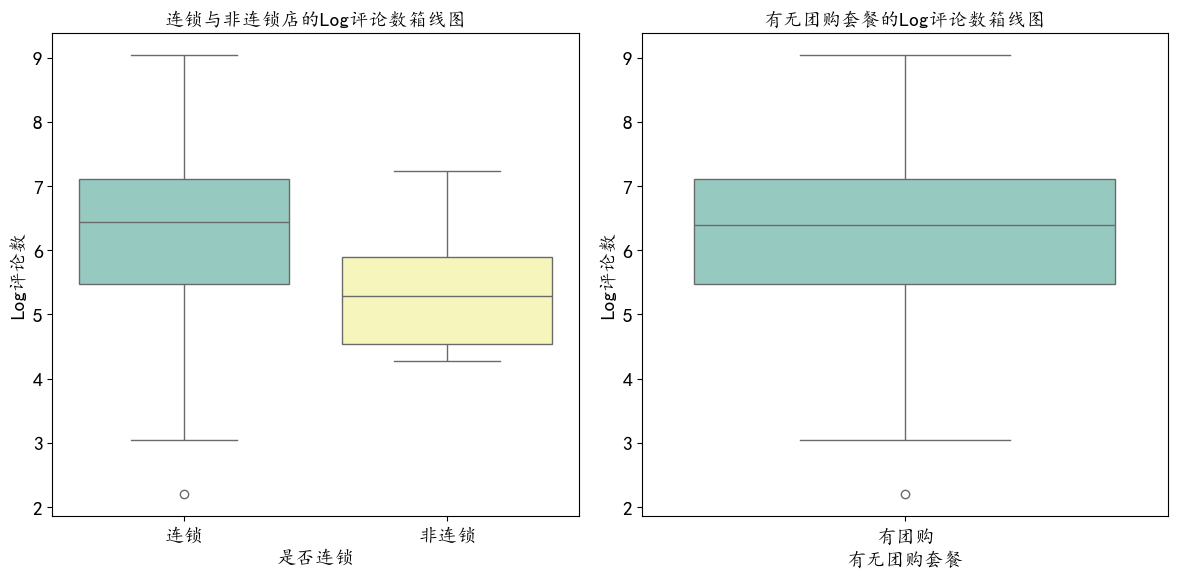

In [10]:
# 对数评价数的分组箱线图
plt.figure(figsize=(12, 6))

plt.subplot(1,2,1)
sns.boxplot(x='是否连锁',y='Log评论数',data=data,palette='Set3')
plt.title('连锁与非连锁店的Log评论数箱线图')
plt.xlabel('是否连锁')
plt.ylabel('Log评论数')

plt.subplot(1,2,2)
sns.boxplot(x='有无团购套餐',y='Log评论数',data=data,palette='Set3')
plt.title('有无团购套餐的Log评论数箱线图')
plt.xlabel('有无团购套餐')
plt.ylabel('Log评论数')
plt.tight_layout()
plt.savefig(os.path.join(output, "对数评论数分组箱线图.png"), dpi=300, bbox_inches='tight')
plt.show()

# 对数评价数的分组箱线图
plt.figure(figsize=(12, 6))

plt.subplot(1,2,1)
sns.boxplot(x='是否连锁',y='Log评论数',data=data_sh,palette='Set3')
plt.title('连锁与非连锁店的Log评论数箱线图')
plt.xlabel('是否连锁')
plt.ylabel('Log评论数')

plt.subplot(1,2,2)
sns.boxplot(x='有无团购套餐',y='Log评论数',data=data_sh,palette='Set3')
plt.title('有无团购套餐的Log评论数箱线图')
plt.xlabel('有无团购套餐')
plt.ylabel('Log评论数')
plt.tight_layout()
plt.savefig(os.path.join(output, "上海对数评论数分组箱线图.png"), dpi=300, bbox_inches='tight')
plt.show()

对于对数评价数，连锁与有团购相比起非连锁和无团购也产生了较为明显的正向影响

In [11]:
from folium.plugins import HeatMap
import folium
heat_data = data[['纬度', '经度']].values.tolist()
map_center = [data['纬度'].mean(), data['经度'].mean()]

m = folium.Map(location=map_center, zoom_start=11, tiles="OpenStreetMap")
HeatMap(
    heat_data,
    radius=35,
    blur=10,
    max_zoom=18,
    min_opacity=0.4
).add_to(m)
m.save(os.path.join(output, "空间分布热力图_店铺密度.html"))


从热力图中可以看出，评论数较多的店铺主要分布在北京市的城区，如朝阳区、海淀区等；而距离市中心较远的店铺的人气都较低。

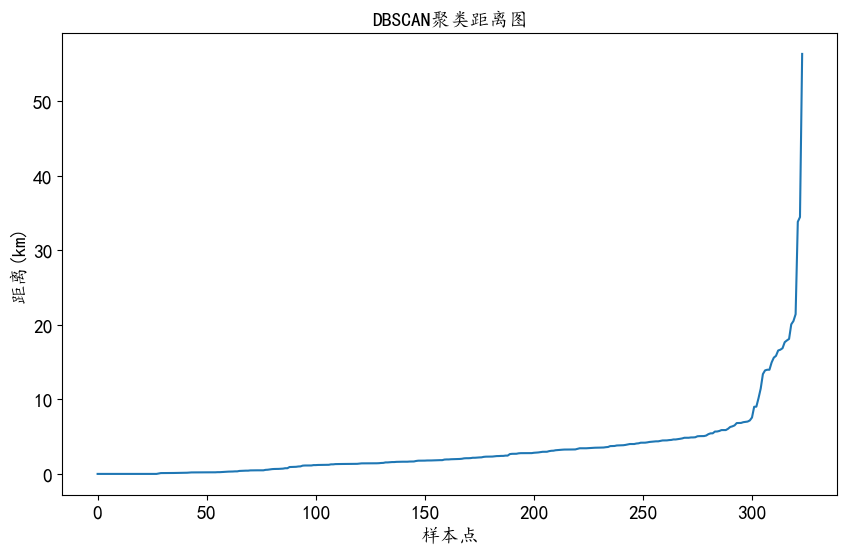

In [12]:
# DBSCAN空间聚类
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

location_rads=np.radians(data[['纬度', '经度']].values) # 将经纬度转换为弧度

min_samples = 5 # 聚类核心点的最小邻居点数量
k=min_samples-1
neibors = NearestNeighbors(n_neighbors=k)
neibors.fit(location_rads)
distances, indices = neibors.kneighbors(location_rads)
distances = np.sort(distances, axis=0)
distances = distances[:, k-1]
distances_km=distances * 6371 # 将弧度转换为千米
plt.figure(figsize=(10, 6))
plt.plot(distances_km)
plt.title('DBSCAN聚类距离图')
plt.xlabel('样本点')
plt.ylabel('距离(km)')
plt.savefig(os.path.join(output, "DBSCAN聚类距离图.png"), dpi=300, bbox_inches='tight')
plt.show()

通过上述DBSCAN聚类的距离识别图，大部分的样本点（即样本点数量为300左右）到其最近的4个点的最大距离都小于5千米，因此如果要使聚类的效果较好的话最好是将参数设为eps_km=5km，但是对于奶茶店这样的店铺而言，通常都是分布在诸如万达等大商场的附近，因此其之间的距离通常较小，因此本研究以3km作为聚类范围

聚类数: 11
噪声点数: 1


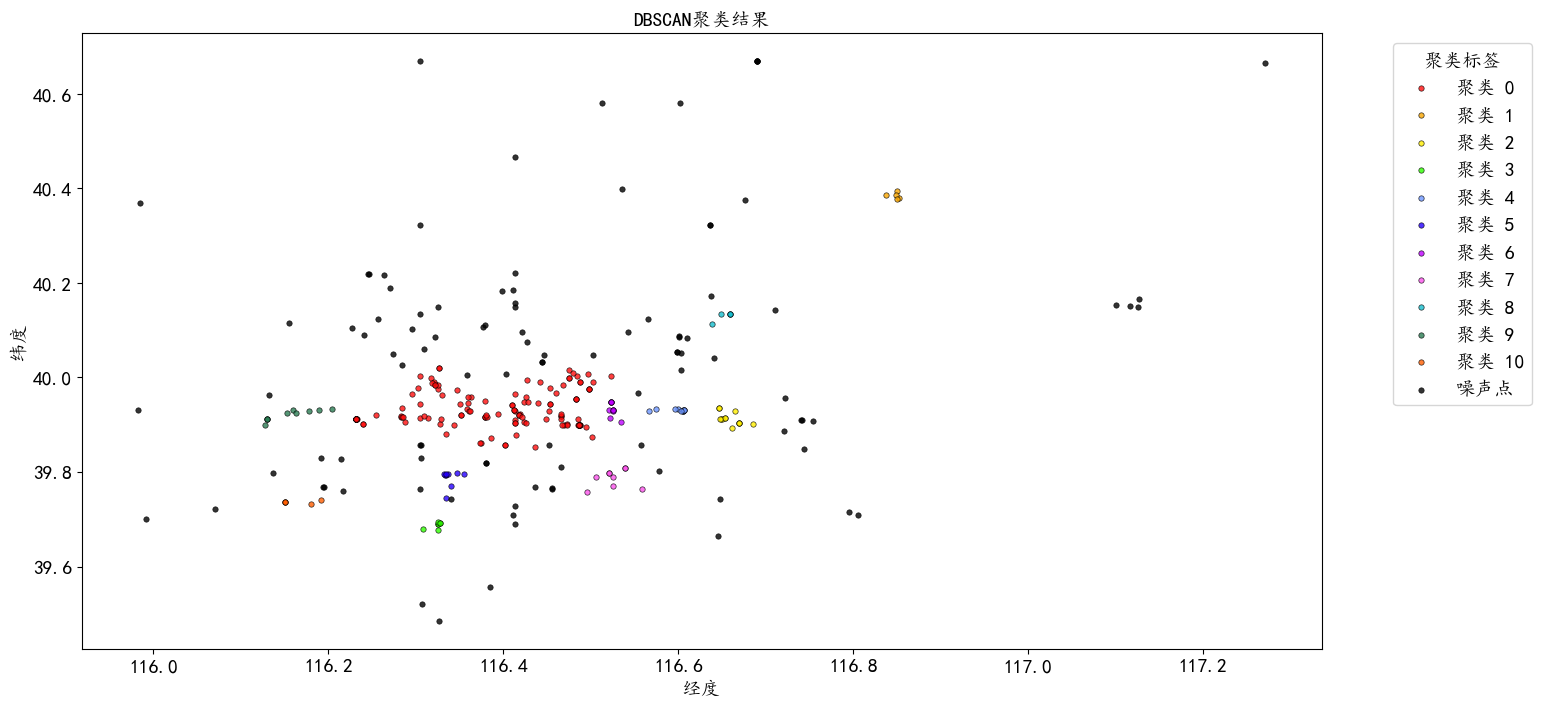

In [13]:
eps_km=3
eps_rads=eps_km/6371
db=DBSCAN(eps=eps_rads, min_samples=min_samples,metric='haversine')
data['DBSCAN_聚类标签'] = db.fit_predict(location_rads)
data['DBSCAN_聚类标签'] = data['DBSCAN_聚类标签'].astype(str)

custom_colors = ["#ff0e0e", "#faa700", "#ffee00ff", "#2fff00ae", 
                 "#6d96ff", "#2600ff", "#bf00ff", "#fc52eb", '#17becf',
                 "#2b7c53", "#FF5E00"]

labels = sorted(data['DBSCAN_聚类标签'].unique(), key=lambda x: int(x))

n_clusters = sum(int(l) >= 0 for l in labels)
print(f"聚类数: {n_clusters}")
print(f"噪声点数: {sum(int(l) == -1 for l in labels)}")

plt.figure(figsize=(16, 8))

for i, color in zip(range(len(labels)), custom_colors):
    mask = data['DBSCAN_聚类标签'] == str(i)
    plt.scatter(data.loc[mask, '经度'], data.loc[mask, '纬度'], 
                c=color, label=f'聚类 {i}', s=15, alpha=0.8, edgecolors="#000000", linewidth=0.5)

noise_mask = data['DBSCAN_聚类标签'] == '-1'
plt.scatter(data.loc[noise_mask, '经度'], data.loc[noise_mask, '纬度'],
            c='black', label='噪声点', s=15, alpha=0.8, edgecolors="#000000", linewidth=0.5)

plt.title('DBSCAN聚类结果')
plt.xlabel('经度')
plt.ylabel('纬度')
plt.legend(title="聚类标签", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig(os.path.join(output, "DBSCAN聚类结果.png"), dpi=300, bbox_inches='tight')
plt.show()

# 使用folium将DBSCAN聚类结果映射到实际地图底图上
m_cluster = folium.Map(location=map_center, zoom_start=11, tiles="OpenStreetMap")
cluster_colors = ['red', 'blue', 'green', 'purple', 'orange', 'brown', "#6E9B26", 'pink', 'beige', 'black','yellow','black']

for l in labels:
    mask = data['DBSCAN_聚类标签'] == l
    color = 'grey' if int(l) == -1 else cluster_colors[int(l) % len(cluster_colors)]
    for _, row in data[mask].iterrows():
        folium.CircleMarker(
            location=[row['纬度'], row['经度']],
            radius=3,
            color=color,
            fill=True,
            fill_color=color,
            fill_opacity=0.7,
            popup=f"聚类: {l}, 店铺: {row['店铺名']}"
        ).add_to(m_cluster)
noise_data = data[data['DBSCAN_聚类标签'] == '-1']
for _, row in noise_data.iterrows():
    folium.CircleMarker(
        location=[row['纬度'], row['经度']],
        radius=3,
        color='grey',
        fill=True,
        fill_color='grey',
        fill_opacity=0.7,
        popup=f"噪声点, 店铺: {row['店铺名']}"
    ).add_to(m_cluster)
m_cluster.save(os.path.join(output, "DBSCAN聚类地图.html"))

In [14]:
# 根据聚类地图确定不同聚类的名称
cluster_name_map = {
    '0': '中心城区', # 由海淀区、朝阳区、东城区、西城区构成的中心城区聚类
    '1': '密云区',
    '2': '通州区',
    '3': '天宫院街道（大兴区）',
    '4': '常营回族乡（朝阳区）',
    '5': '西红门镇（大兴区）',
    '6': '平房乡（朝阳区）',
    '7': '马驹桥镇（通州区）',
    '8': '顺义区',
    '9': '石景山区',
    '10': '房山区',
    '-1': '噪声点'
}

data['聚类名称'] = data['DBSCAN_聚类标签'].map(cluster_name_map)

In [15]:
numeric_cols_all = ['总评分', '人均价格', '营业时间', '口味评分', '环境评分', '服务评分', 'Log评论数','评论数']
# 输出不同DBSCAN聚类标签的描述性统计结果
grouped_stats = data.groupby('聚类名称')[numeric_cols_all].describe().round(2)
display(grouped_stats)

总评分                                           人均价格         ...  \
            count  mean   std  min   25%   50%   75%  max  count   mean  ...   
聚类名称                                                                     ...   
中心城区        136.0  3.91  0.28  3.1  3.70  3.90  4.10  4.6  136.0  18.16  ...   
噪声点         102.0  3.89  0.27  3.3  3.70  3.90  4.10  4.5  102.0  15.74  ...   
天宫院街道（大兴区）    7.0  4.09  0.16  3.8  4.05  4.10  4.15  4.3    7.0  17.43  ...   
密云区           5.0  3.80  0.14  3.7  3.70  3.70  3.90  4.0    5.0  20.60  ...   
常营回族乡（朝阳区）   12.0  4.06  0.24  3.7  3.88  4.10  4.22  4.4   12.0  17.33  ...   
平房乡（朝阳区）     11.0  3.86  0.25  3.3  3.75  3.90  4.00  4.2   11.0  18.36  ...   
房山区           5.0  3.96  0.30  3.5  3.80  4.10  4.20  4.2    5.0  13.60  ...   
石景山区         10.0  3.95  0.30  3.6  3.65  3.95  4.18  4.4   10.0  17.30  ...   
西红门镇（大兴区）     9.0  3.82  0.16  3.6  3.70  3.90  3.90  4.0    9.0  16.89  ...   
通州区          13.0  3.95  0.28  3.5  3.80  3.90  4.00  4.4   13.0  16.00  ...   
顺义区           5.0  4.20  0.35  3.6  4.20  4.30  4.40  4.5    5.0  17.00  ...   
马驹桥镇（通州区）     9.0  4.06  0.29  3.5  4.00  4.20  4.20  4.4    9.0  19.44  ...   

           Log评论数          评论数                                          \
              75%   max  count     mean      std   min     25%     50%   
聚类名称                                                                     
中心城区         6.25  9.08  136.0   586.68  1164.74   2.0   47.75   173.0   
噪声点          6.24  8.63  102.0   336.29   620.14   2.0   37.25   130.0   
天宫院街道（大兴区）   6.61  7.01    7.0   567.57   368.20  96.0  347.00   532.0   
密云区          6.64  6.66    5.0   451.00   317.93  57.0  247.00   408.0   
常营回族乡（朝阳区）   6.82  7.32   12.0   555.00   558.97  25.0  115.25   361.0   
平房乡（朝阳区）     7.32  7.67   11.0   863.64   768.23  43.0  156.50   570.0   
房山区          6.41  6.51    5.0   317.80   312.43   3.0   27.00   285.0   
石景山区         6.41  7.52   10.0   522.60   524.31   1.0  293.75   405.0   
西红门镇（大兴区）    7.47  8.68    9.0  1333.22  2126.96  10.0   25.00   112.0   
通州区          6.60  7.88   13.0   529.77   727.32   2.0   47.00   314.0   
顺义区          7.50  7.91    5.0  1267.20  1110.17   5.0  329.00  1469.0   
马驹桥镇（通州区）    6.38  7.36    9.0   537.56   434.22  24.0  366.00   531.0   

                            
               75%     max  
聚类名称                        
中心城区         515.0  8762.0  
噪声点          510.0  5611.0  
天宫院街道（大兴区）   771.5  1108.0  
密云区          762.0   781.0  
常营回族乡（朝阳区）   934.0  1515.0  
平房乡（朝阳区）    1504.5  2141.0  
房山区          606.0   668.0  
石景山区         616.5  1837.0  
西红门镇（大兴区）   1747.0  5872.0  
通州区          736.0  2643.0  
顺义区         1809.0  2724.0  
马驹桥镇（通州区）    591.0  1571.0  

[12 rows x 64 columns]

In [16]:
# 合并多组聚类
merge_map = {
    '平房乡（朝阳区）': '朝阳区东部',
    '常营回族乡（朝阳区）': '朝阳区东部',
    '马驹桥镇（通州区）': '通州区',
    '通州区': '通州区',
    '天宫院街道（大兴区）': '大兴区',
    '西红门镇（大兴区）': '大兴区'
}
data['聚类名称'] = data['聚类名称'].replace(merge_map)
data['聚类名称'] = pd.Categorical(
    data['聚类名称'],
    categories=[c for c in data['聚类名称'].unique() if c != '噪声点'] + ['噪声点'],
    ordered=True
)
grouped_stats_merged = data.groupby('聚类名称')[numeric_cols_all].describe().round(2)
grouped_stats_merged = data.groupby('聚类名称', observed=False)[numeric_cols_all].describe().round(2)
display(grouped_stats_merged)

C:\Users\21515\AppData\Local\Temp\ipykernel_24864\1206944472.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_stats_merged = data.groupby('聚类名称')[numeric_cols_all].describe().round(2)


总评分                                           人均价格         ...  \
       count  mean   std  min   25%   50%   75%  max  count   mean  ...   
聚类名称                                                                ...   
中心城区   136.0  3.91  0.28  3.1  3.70  3.90  4.10  4.6  136.0  18.16  ...   
大兴区     16.0  3.94  0.20  3.6  3.80  3.95  4.10  4.3   16.0  17.12  ...   
密云区      5.0  3.80  0.14  3.7  3.70  3.70  3.90  4.0    5.0  20.60  ...   
通州区     22.0  3.99  0.28  3.5  3.82  4.00  4.20  4.4   22.0  17.41  ...   
朝阳区东部   23.0  3.97  0.26  3.3  3.80  4.00  4.15  4.4   23.0  17.83  ...   
顺义区      5.0  4.20  0.35  3.6  4.20  4.30  4.40  4.5    5.0  17.00  ...   
房山区      5.0  3.96  0.30  3.5  3.80  4.10  4.20  4.2    5.0  13.60  ...   
石景山区    10.0  3.95  0.30  3.6  3.65  3.95  4.18  4.4   10.0  17.30  ...   
噪声点    102.0  3.89  0.27  3.3  3.70  3.90  4.10  4.5  102.0  15.74  ...   

      Log评论数          评论数                                                   \
         75%   max  count     mean      std   min     25%     50%      75%   
聚类名称                                                                         
中心城区    6.25  9.08  136.0   586.68  1164.74   2.0   47.75   173.0   515.00   
大兴区     6.93  8.68   16.0   998.25  1618.91  10.0   83.25   405.5  1021.00   
密云区     6.64  6.66    5.0   451.00   317.93  57.0  247.00   408.0   762.00   
通州区     6.42  7.88   22.0   532.95   611.66   2.0   97.00   426.0   610.75   
朝阳区东部   7.21  7.67   23.0   702.61   670.32  25.0  116.50   400.0  1349.00   
顺义区     7.50  7.91    5.0  1267.20  1110.17   5.0  329.00  1469.0  1809.00   
房山区     6.41  6.51    5.0   317.80   312.43   3.0   27.00   285.0   606.00   
石景山区    6.41  7.52   10.0   522.60   524.31   1.0  293.75   405.0   616.50   
噪声点     6.24  8.63  102.0   336.29   620.14   2.0   37.25   130.0   510.00   

               
          max  
聚类名称           
中心城区   8762.0  
大兴区    5872.0  
密云区     781.0  
通州区    2643.0  
朝阳区东部  2141.0  
顺义区    2724.0  
房山区     668.0  
石景山区   1837.0  
噪声点    5611.0  

[9 rows x 64 columns]

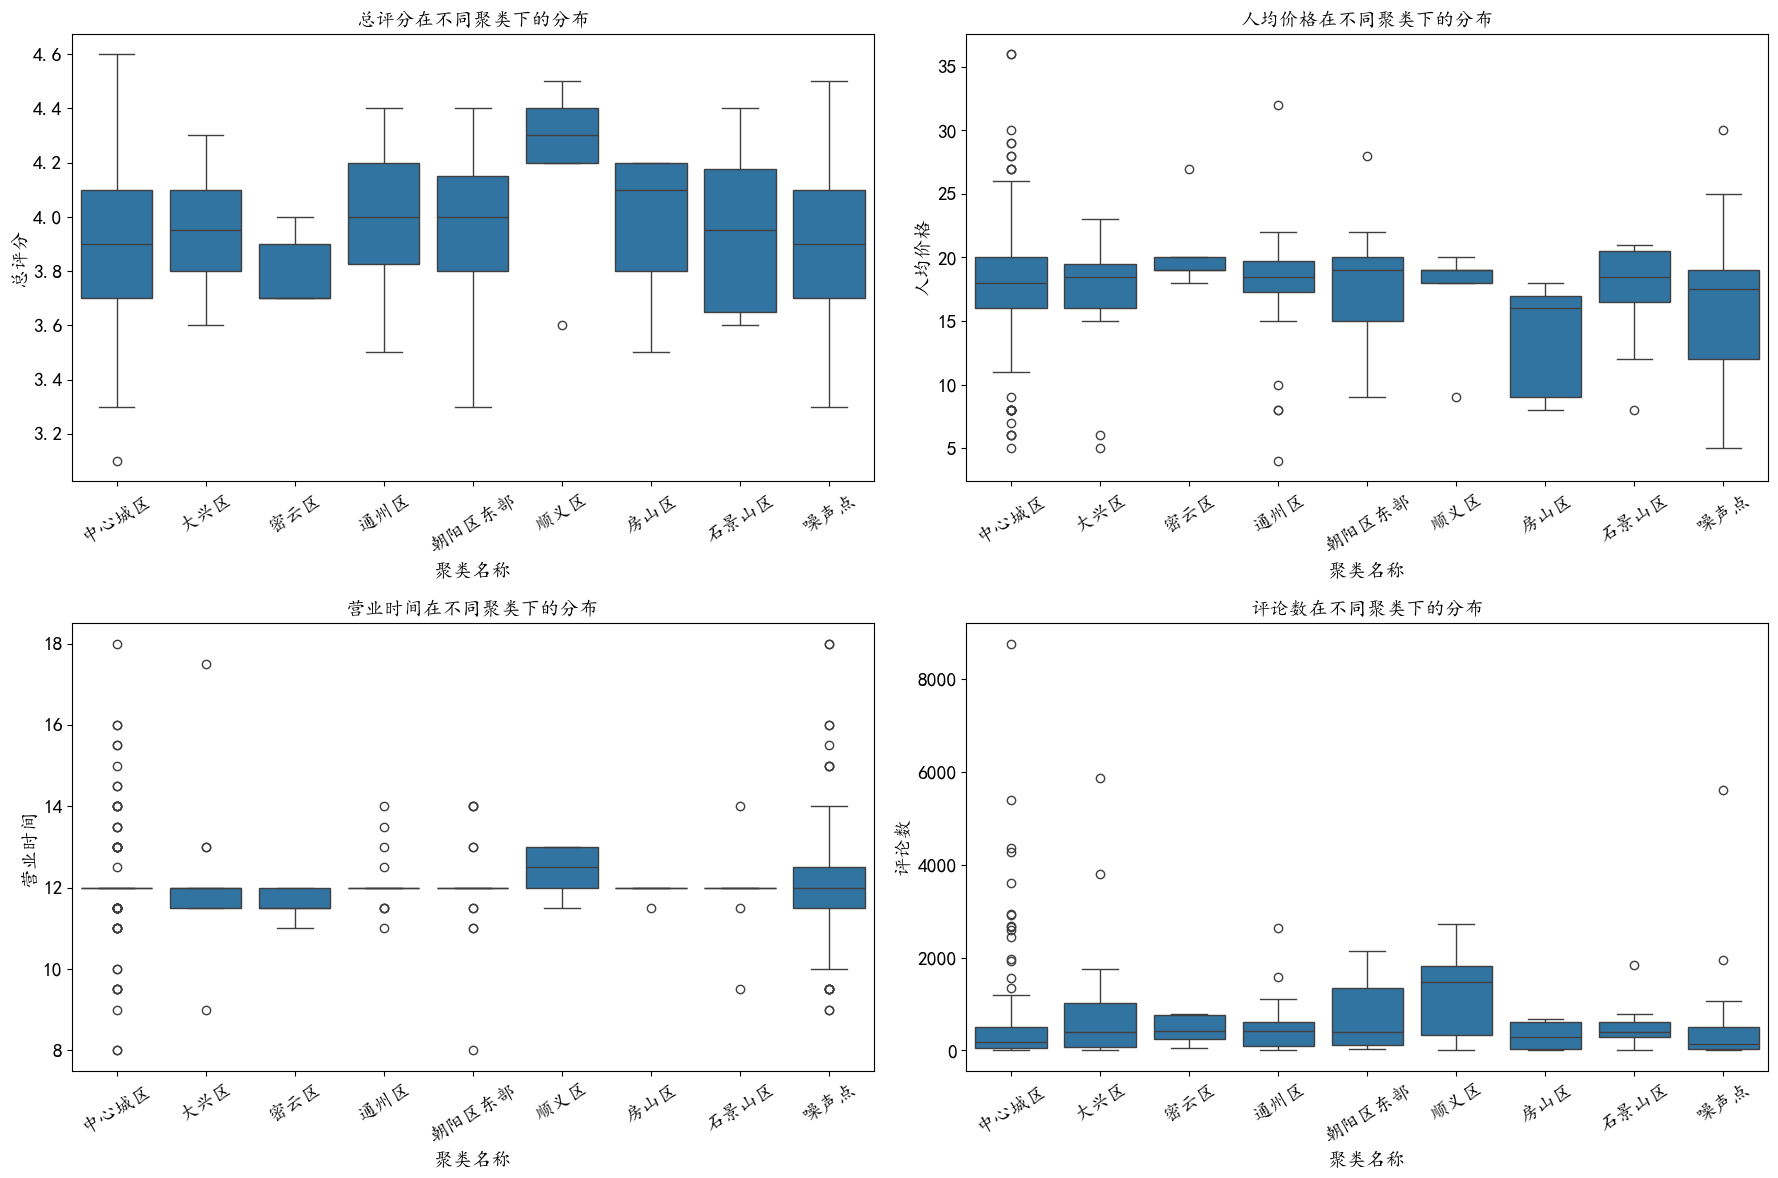

In [17]:
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

box_cols = ['总评分', '人均价格', '营业时间', '评论数']
titles = ['总评分', '人均价格', '营业时间', '评论数']

for ax, col, title in zip(axes.flatten(), box_cols, titles):
    sns.boxplot(x=data['聚类名称'], y=data[col], ax=ax)
    ax.set_title(f"{title}在不同聚类下的分布")
    ax.set_xlabel("聚类名称")
    ax.set_ylabel(title)
    ax.tick_params(axis='x', rotation=30)

plt.tight_layout()
plt.savefig(os.path.join(output, "聚类分组箱线图.png"), dpi=300, bbox_inches='tight')
plt.show()

可以看出聚类后的各区域之间的差别并不大

中心城区在各变量上的范围都比较大，顺义区的总评分与评论数都比较占优，可能是因为样本量相对较少

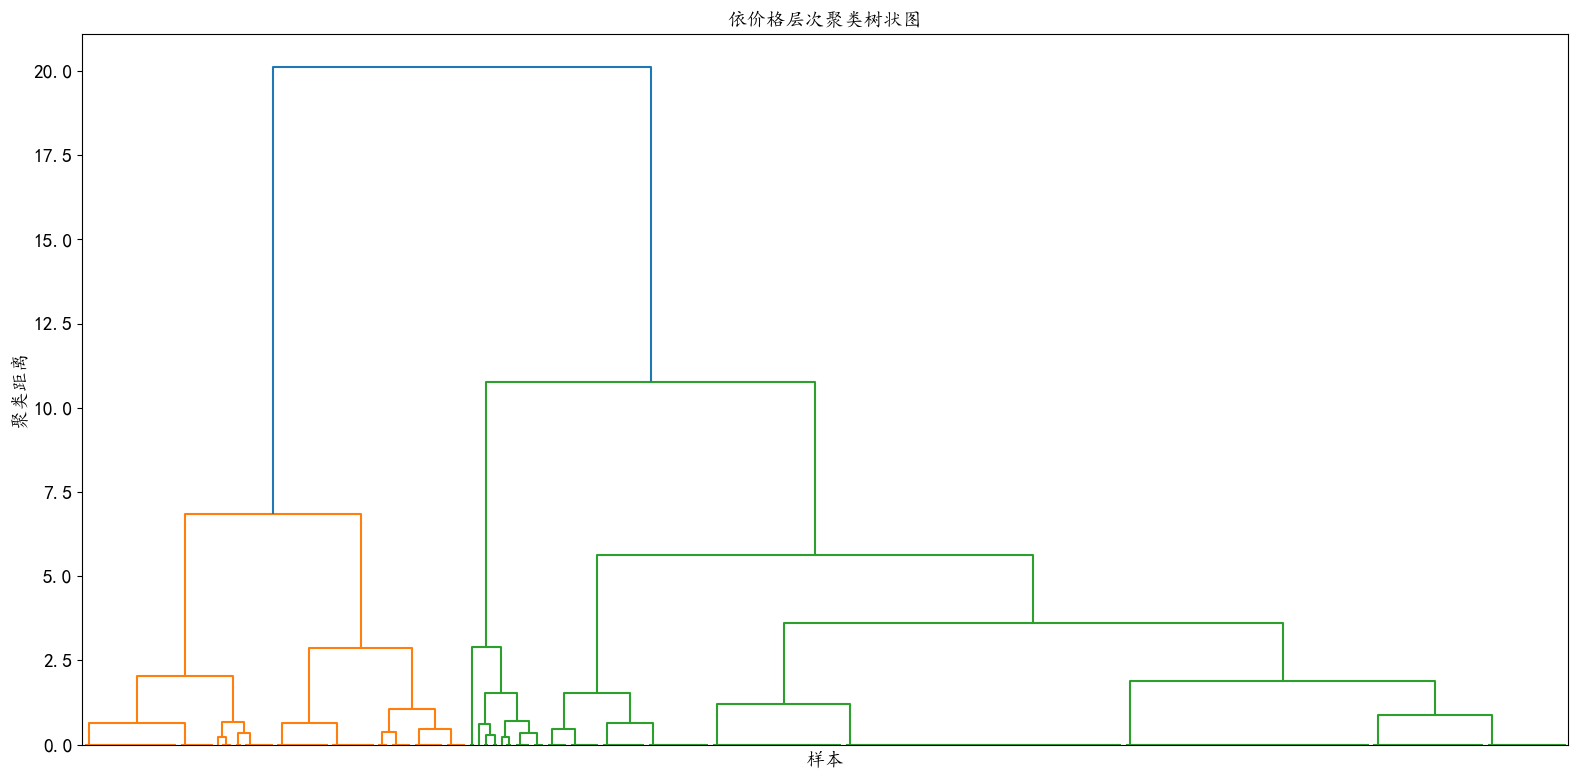

总评分                                        人均价格         ...  \
             count  mean   std  min  25%  50%  75%  max  count   mean  ...   
HierCluster                                                            ...   
1             84.0  3.68  0.23  3.1  3.5  3.6  3.8  4.4   84.0  10.25  ...   
2            240.0  4.00  0.24  3.5  3.8  4.0  4.2  4.6  240.0  19.62  ...   

            服务评分      Log评论数                                            
             75%  max  count  mean   std   min   25%   50%   75%   max  
HierCluster                                                             
1            3.8  4.4   84.0  3.33  1.10  0.69  2.54  3.50  4.02  6.02  
2            4.2  4.7  240.0  5.75  1.43  1.10  5.03  5.98  6.64  9.08  

[2 rows x 56 columns]

In [18]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import StandardScaler
from IPython.display import display

scaler = StandardScaler()
features = data[['人均价格']]
features_scaled = scaler.fit_transform(features)
Z = linkage(features_scaled, method='ward')
plt.figure(figsize=(16, 8))
dendrogram(Z, no_labels=True)
plt.title("依价格层次聚类树状图")
plt.xlabel("样本")
plt.ylabel("聚类距离")
plt.tight_layout()
plt.savefig(os.path.join(output, "依价格层次聚类树状图.png"), dpi=300, bbox_inches='tight')
plt.show()
hier_clusters = fcluster(Z, t=2, criterion='maxclust')
data['HierCluster'] = hier_clusters.astype(str) 
grouped_stats_hier = data.groupby('HierCluster', observed=False)[numeric_cols].describe().round(2)
display(grouped_stats_hier)


In [19]:
from libpysal.weights import KNN
from esda.moran import Moran
import geopandas as gpd
from shapely.geometry import Point

geometry = [Point(xy) for xy in zip(data['经度'], data['纬度'])]
gdf = gpd.GeoDataFrame(data, geometry=geometry)

knn_weights = KNN.from_dataframe(gdf, k=8)
knn_weights.transform = 'R'  # 行标准化

# 选择变量（例如：总评分）进行Moran's I分析
moran_total = Moran(gdf['Log评论数'], knn_weights)
print("Moran's I:", moran_total.I)
print("p-value:", moran_total.p_sim)

Moran's I: 0.05791740952862186
p-value: 0.012


Moran值不高，只有0.05，说明空间上的相关度不是很高，比较微弱，但是p<0.05，说明还是显著的。

4. 建模分析

4.1 基准回归

In [20]:
# 哑变量化
dummies_chain = pd.get_dummies(data['是否连锁'], prefix='是否连锁')
dummies_chain = dummies_chain.drop('是否连锁_非连锁', axis=1)
dummies_group = pd.get_dummies(data['有无团购套餐'], prefix='有无团购套餐')
dummies_group = dummies_group.drop('有无团购套餐_无团购', axis=1)
dummies_cluster = pd.get_dummies(data['聚类名称'], prefix='聚类名称')
dummies_cluster = dummies_cluster.drop('聚类名称_噪声点', axis=1)
dummies_category = pd.get_dummies(data['主营品类'], prefix='主营品类')
dummies_category = dummies_category.drop('主营品类_其他', axis=1)
data = pd.concat([
    data.drop(['是否连锁', '有无团购套餐', '聚类名称', '主营品类'], axis=1),
    dummies_chain,
    dummies_group,
    dummies_cluster,
    dummies_category
], axis=1)

In [21]:
# 基准回归
import statsmodels.api as sm
y = data['Log评论数']
x=data[['人均价格','营业时间','总评分','是否连锁_连锁',
       '有无团购套餐_有团购']]
x = sm.add_constant(x)
x=x.astype(float)
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Log评论数   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                     64.67
Date:                Sun, 25 May 2025   Prob (F-statistic):           1.98e-46
Time:                        16:26:00   Log-Likelihood:                -521.60
No. Observations:                 324   AIC:                             1055.
Df Residuals:                     318   BIC:                             1078.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.6956      1.227     -5.456      0.0

In [22]:
y=data['Log评论数']
x=data[['人均价格','营业时间','总评分','是否连锁_连锁',
       '有无团购套餐_有团购','主营品类_奶茶', '主营品类_果茶', 
       '主营品类_纯茶', '主营品类_风味牛奶', '主营品类_甜品/小吃',
       '品牌效应']]
x = sm.add_constant(x)
x=x.astype(float)
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Log评论数   R-squared:                       0.570
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     37.57
Date:                Sun, 25 May 2025   Prob (F-statistic):           8.85e-51
Time:                        16:26:00   Log-Likelihood:                -498.61
No. Observations:                 324   AIC:                             1021.
Df Residuals:                     312   BIC:                             1067.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.7693      1.250     -6.216      0.0

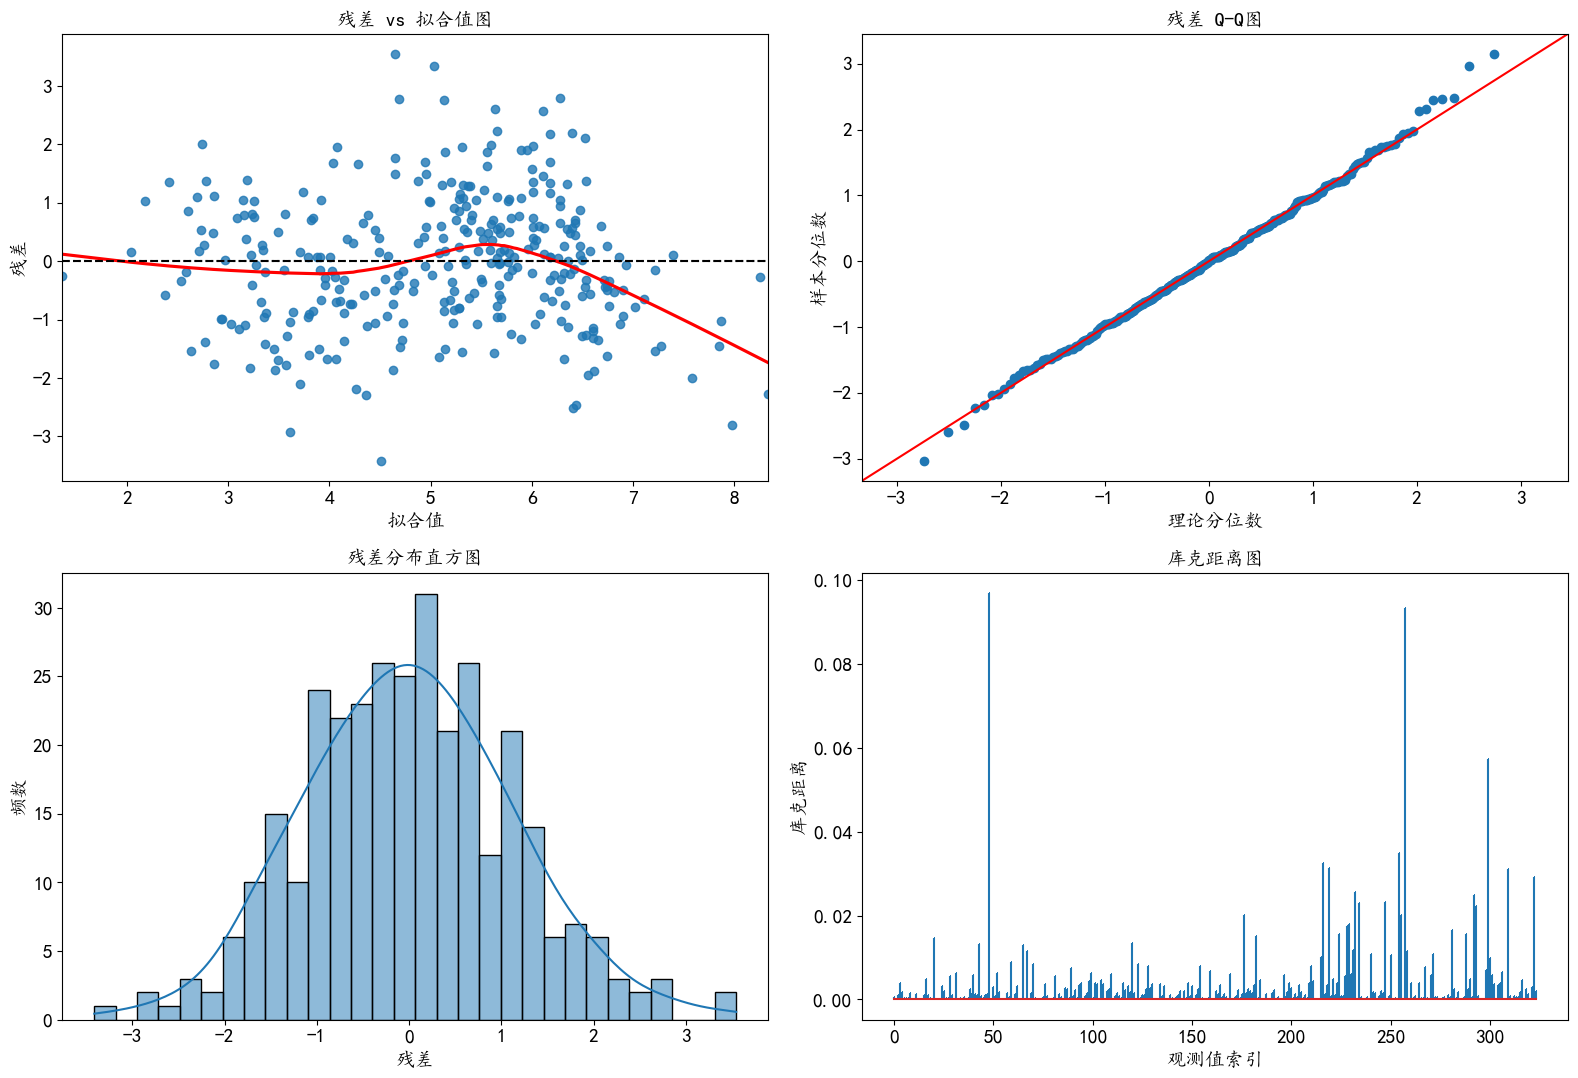

In [23]:
plt.figure(figsize=(16, 11))

plt.subplot(2,2,1)
sns.residplot(x=model.fittedvalues, y=model.resid, lowess=True, line_kws={'color': 'red'})
plt.xlabel('拟合值')
plt.ylabel('残差')
plt.title('残差 vs 拟合值图')
plt.axhline(0, color='black', linestyle='--')

ax2 = plt.subplot(2,2,2)
sm.qqplot(model.resid, line='45', fit=True, ax=ax2)
ax2.set_title('残差 Q-Q图')
ax2.set_xlabel('理论分位数')
ax2.set_ylabel('样本分位数')

plt.subplot(2,2,3)
sns.histplot(model.resid, kde=True, bins=30)
plt.title('残差分布直方图')
plt.xlabel('残差')
plt.ylabel('频数')

plt.subplot(2,2,4)
influence = model.get_influence()
(c, _) = influence.cooks_distance
plt.stem(np.arange(len(c)), c, markerfmt=",")
plt.title("库克距离图")
plt.xlabel('观测值索引')
plt.ylabel("库克距离")

plt.tight_layout()
plt.savefig(os.path.join(output, "残差诊断图.png"), dpi=300, bbox_inches='tight')
plt.show()

残差分析基本符合正态性假设，但是存在一定的异方差性，有可能是因为存在着非线性的影响，有可能是营业时间

4.2 回归模型优化

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

x['营业时间_平方'] = x['营业时间'] ** 2
model2 = sm.OLS(y, x).fit()
print(model2.summary())
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
display(vif_data)

                            OLS Regression Results                            
Dep. Variable:                 Log评论数   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.579
Method:                 Least Squares   F-statistic:                     37.95
Date:                Sun, 25 May 2025   Prob (F-statistic):           7.79e-54
Time:                        16:26:43   Log-Likelihood:                -489.14
No. Observations:                 324   AIC:                             1004.
Df Residuals:                     311   BIC:                             1053.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -17.2870      2.514     -6.876      0.0

,feature,VIF
0,const,1639.385944
1,人均价格,1.723116
2,营业时间,66.750030
3,总评分,1.471849
4,是否连锁_连锁,1.571324
5,有无团购套餐_有团购,1.498963
6,主营品类_奶茶,2.132237
7,主营品类_果茶,1.920256
8,主营品类_纯茶,1.633240
9,主营品类_风味牛奶,1.359931


In [26]:
# 做些预测
example_data = pd.DataFrame({
    '人均价格': [15, 20, 25, 18, 22],
    '营业时间': [12, 10, 14, 11, 13],
    '总评分': [4.0, 4.5, 3.8, 4.2, 4.1],
    '是否连锁_连锁': [1, 0, 1, 1, 0],
    '有无团购套餐_有团购': [1, 1, 0, 0, 1],
    '主营品类_奶茶': [1, 0, 0, 0, 0],
    '主营品类_果茶': [0, 0, 0, 0, 1],
    '主营品类_纯茶': [0, 0, 1, 0, 0],
    '主营品类_风味牛奶': [0, 1, 0, 0, 0],
    '主营品类_甜品/小吃': [0, 0, 0, 1, 0],
    '品牌效应': [10, 0, 25, 15, 0]
})

example_data['营业时间_平方'] = example_data['营业时间'] ** 2
example_data = sm.add_constant(example_data)
log_predictions = model2.predict(example_data)
original_predictions = np.expm1(log_predictions)
print("预测的评论数:", original_predictions)

预测的评论数: 0    134.474593
1    214.736213
2    474.883379
3    361.111490
4    236.125684
dtype: float64


加入营业时间的二次项之后直接变得非常显著，说明评论数与营业时间之间确实存在着显著的二次关系

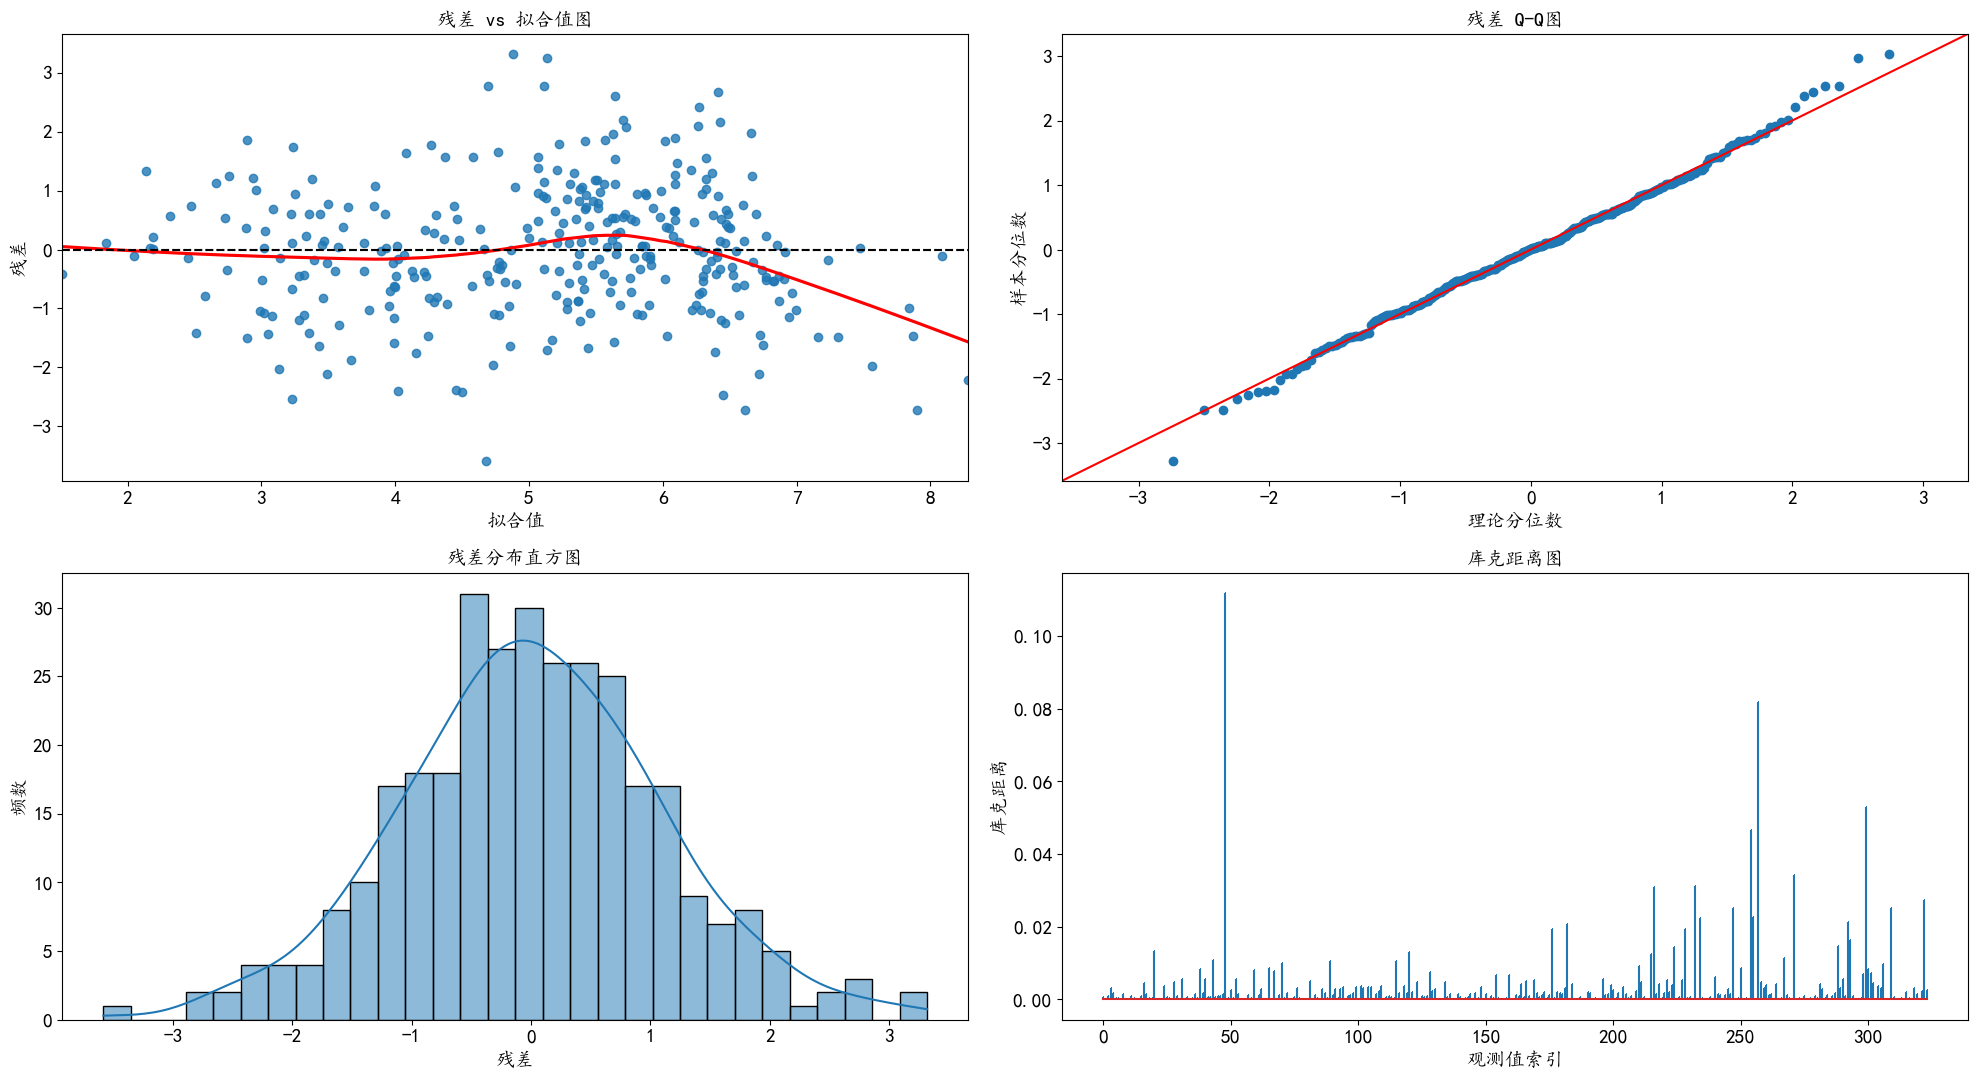

In [162]:
plt.figure(figsize=(20, 11))

plt.subplot(2,2,1)
sns.residplot(x=model2.fittedvalues, y=model2.resid, lowess=True, line_kws={'color': 'red'})
plt.xlabel('拟合值')
plt.ylabel('残差')
plt.title('残差 vs 拟合值图')
plt.axhline(0, color='black', linestyle='--')

ax2 = plt.subplot(2,2,2)
sm.qqplot(model2.resid, line='45', fit=True, ax=ax2)
ax2.set_title('残差 Q-Q图')
ax2.set_xlabel('理论分位数')
ax2.set_ylabel('样本分位数')

plt.subplot(2,2,3)
sns.histplot(model2.resid, kde=True, bins=30)
plt.title('残差分布直方图')
plt.xlabel('残差')
plt.ylabel('频数')

plt.subplot(2,2,4)
influence = model2.get_influence()
(c, _) = influence.cooks_distance
stem_container = plt.stem(np.arange(len(c)), c, markerfmt=",")
plt.title("库克距离图")
plt.xlabel('观测值索引')
plt.ylabel("库克距离")

plt.tight_layout()
plt.savefig(os.path.join(output, "残差诊断图_加入营业时间平方项.png"), dpi=300, bbox_inches='tight')
plt.show()

In [172]:
data['HierCluster'] = data['HierCluster'].replace({'1': '低人均价格', '2': '高人均价格'})

In [ ]:
# 对聚类低价组进行回归
low_price_mask = data['HierCluster'] == '低人均价格'
data_low_price = data[low_price_mask]

x_low = data_low_price[['人均价格','营业时间','总评分','是否连锁_连锁',
                        '有无团购套餐_有团购','主营品类_奶茶', '主营品类_果茶', 
                        '主营品类_纯茶', '主营品类_风味牛奶', '主营品类_甜品/小吃',
                        '品牌效应']]
x_low['营业时间_平方'] = x_low['营业时间'] ** 2
x_low = sm.add_constant(x_low)
x_low = x_low.astype(float)
y_low = data_low_price['Log评论数']
model_low_price = sm.OLS(y_low, x_low).fit()
print(model_low_price.summary())

                            OLS Regression Results                            
Dep. Variable:                 Log评论数   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     4.845
Date:                  周三, 21 5月 2025   Prob (F-statistic):           9.25e-06
Time:                        20:20:41   Log-Likelihood:                -101.46
No. Observations:                  84   AIC:                             228.9
Df Residuals:                      71   BIC:                             260.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -12.9318      5.119     -2.526      0.0

C:\Users\21515\AppData\Local\Temp\ipykernel_38224\1104052402.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_low['营业时间_平方'] = x_low['营业时间'] ** 2


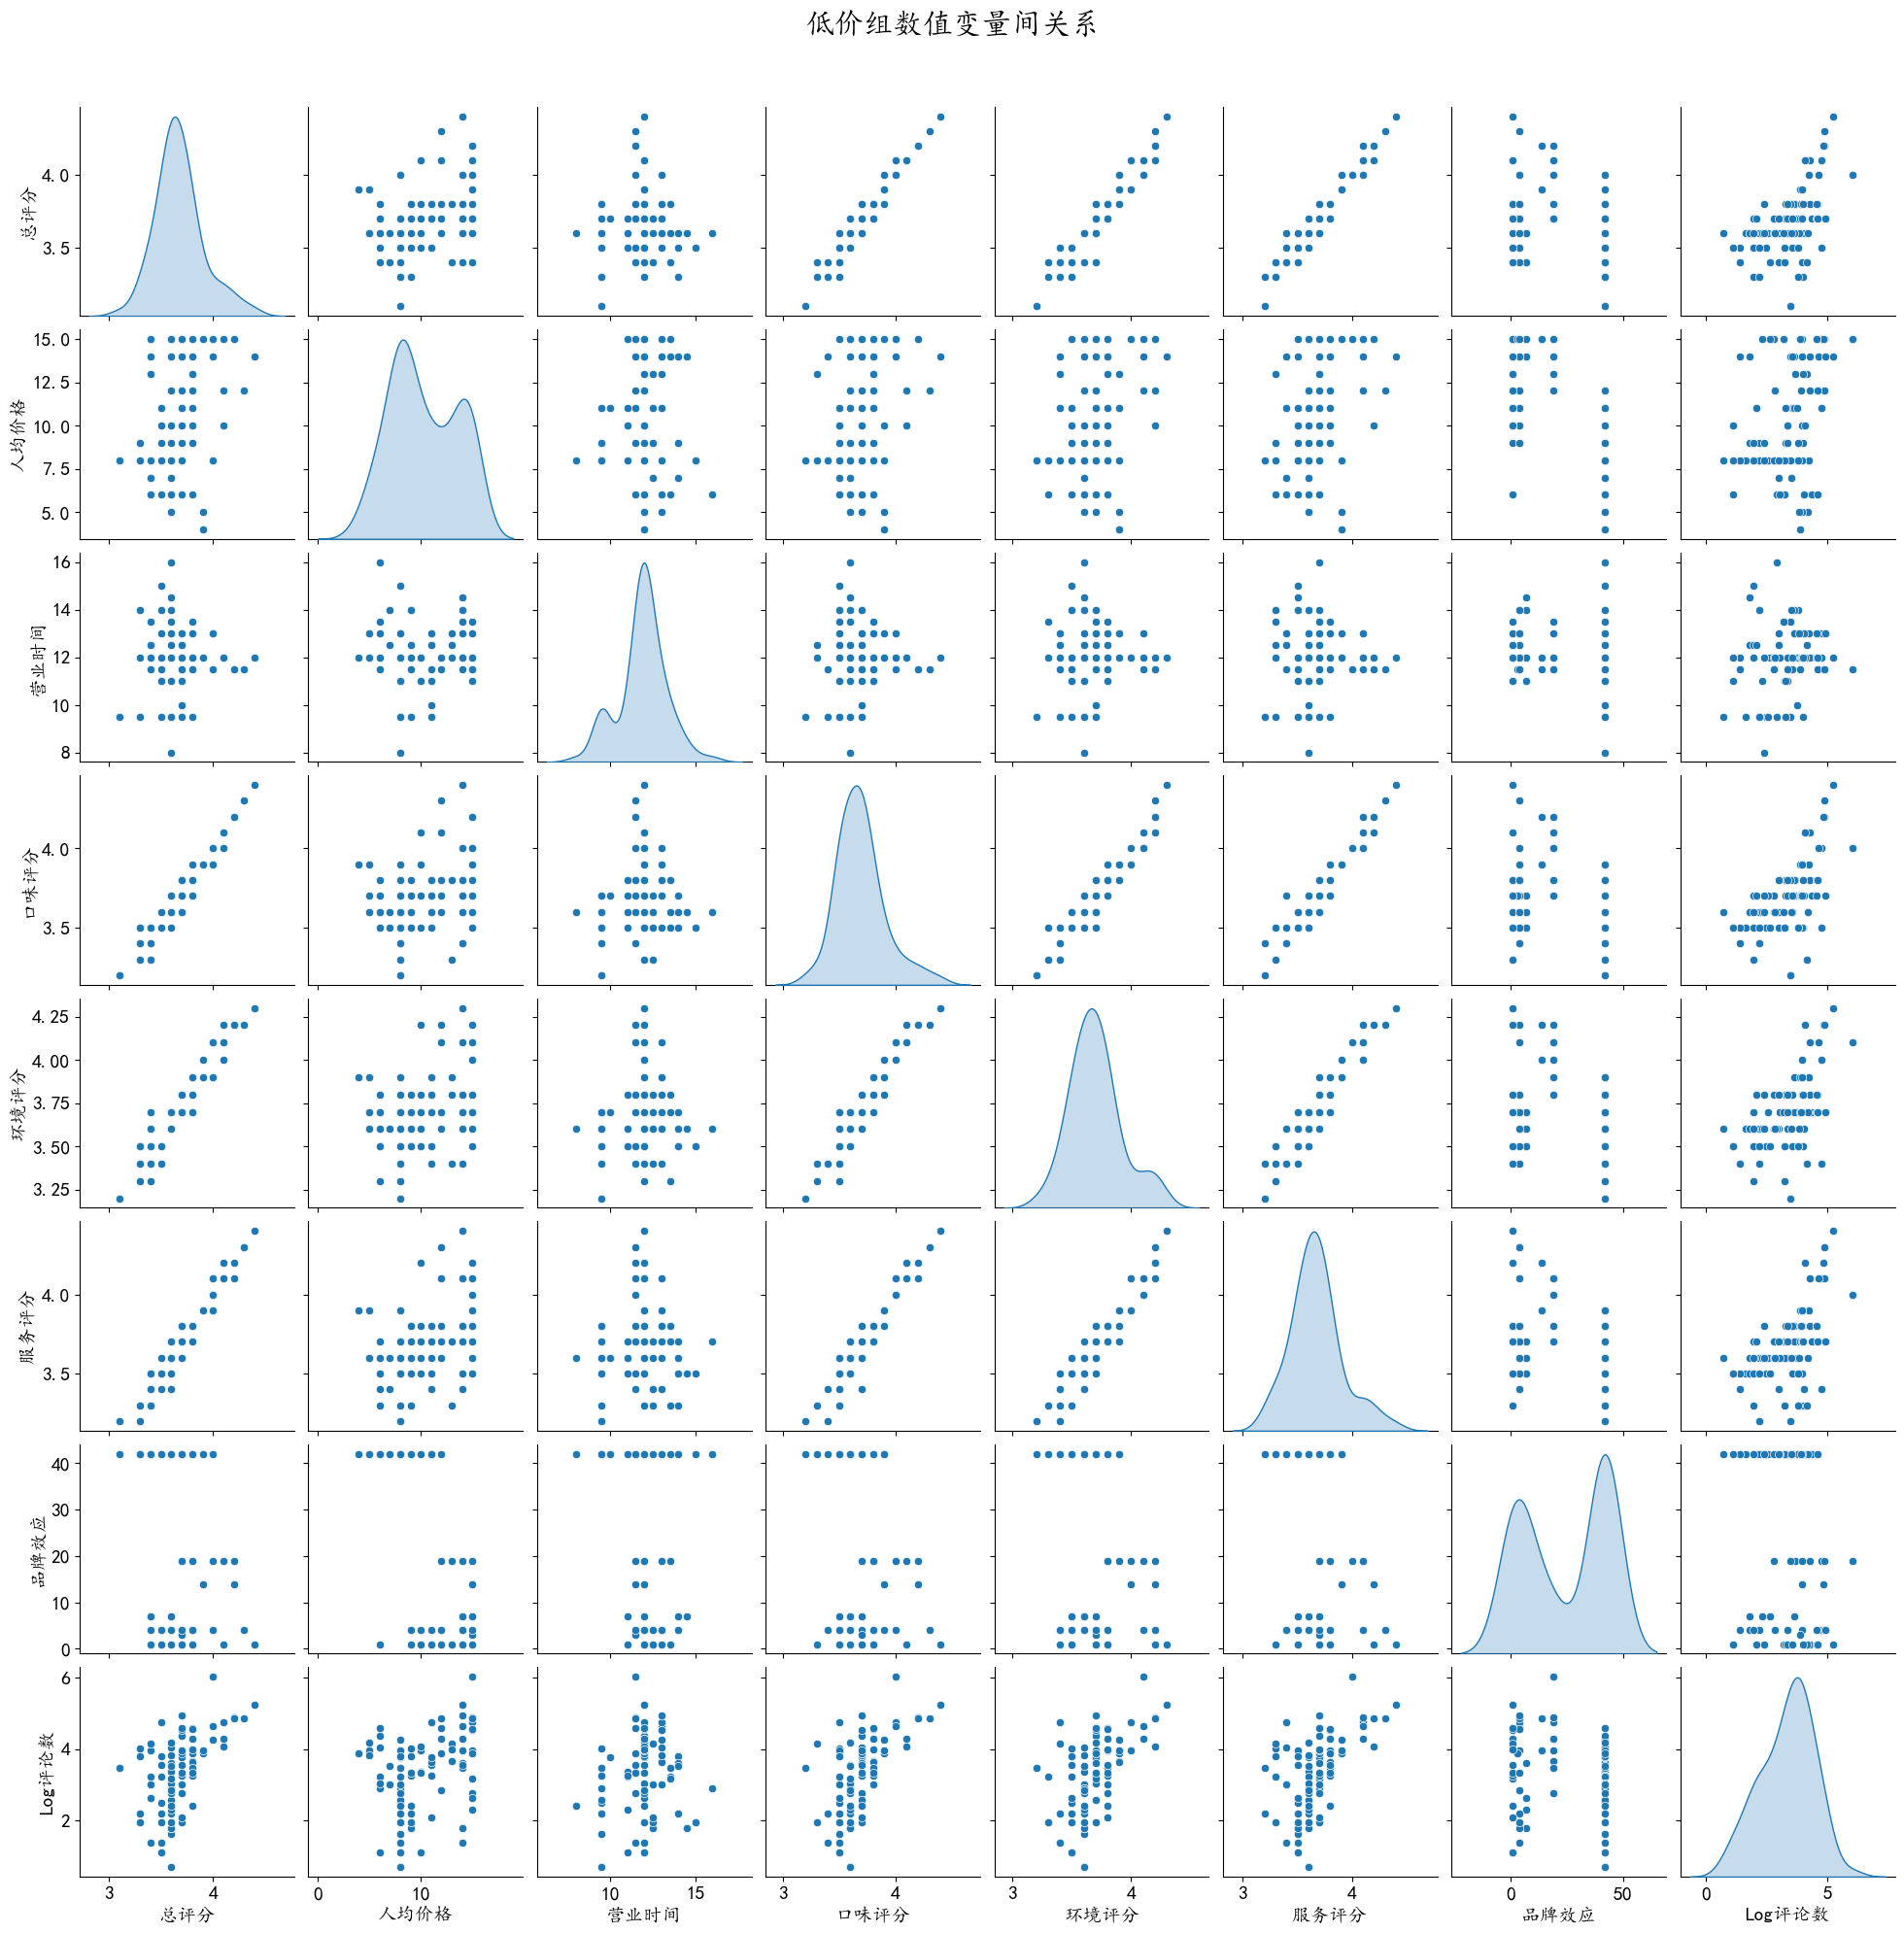

In [169]:
# 对低价组画配对散点图
grid_low = sns.pairplot(data[low_price_mask][numeric_cols], diag_kind='kde', markers='o')
grid_low.fig.suptitle("低价组数值变量间关系", fontsize=22, y=1.00)
plt.subplots_adjust(top=0.95)
plt.savefig(os.path.join(output, "低价组数值变量间关系.png"), dpi=300, bbox_inches='tight')
plt.show()

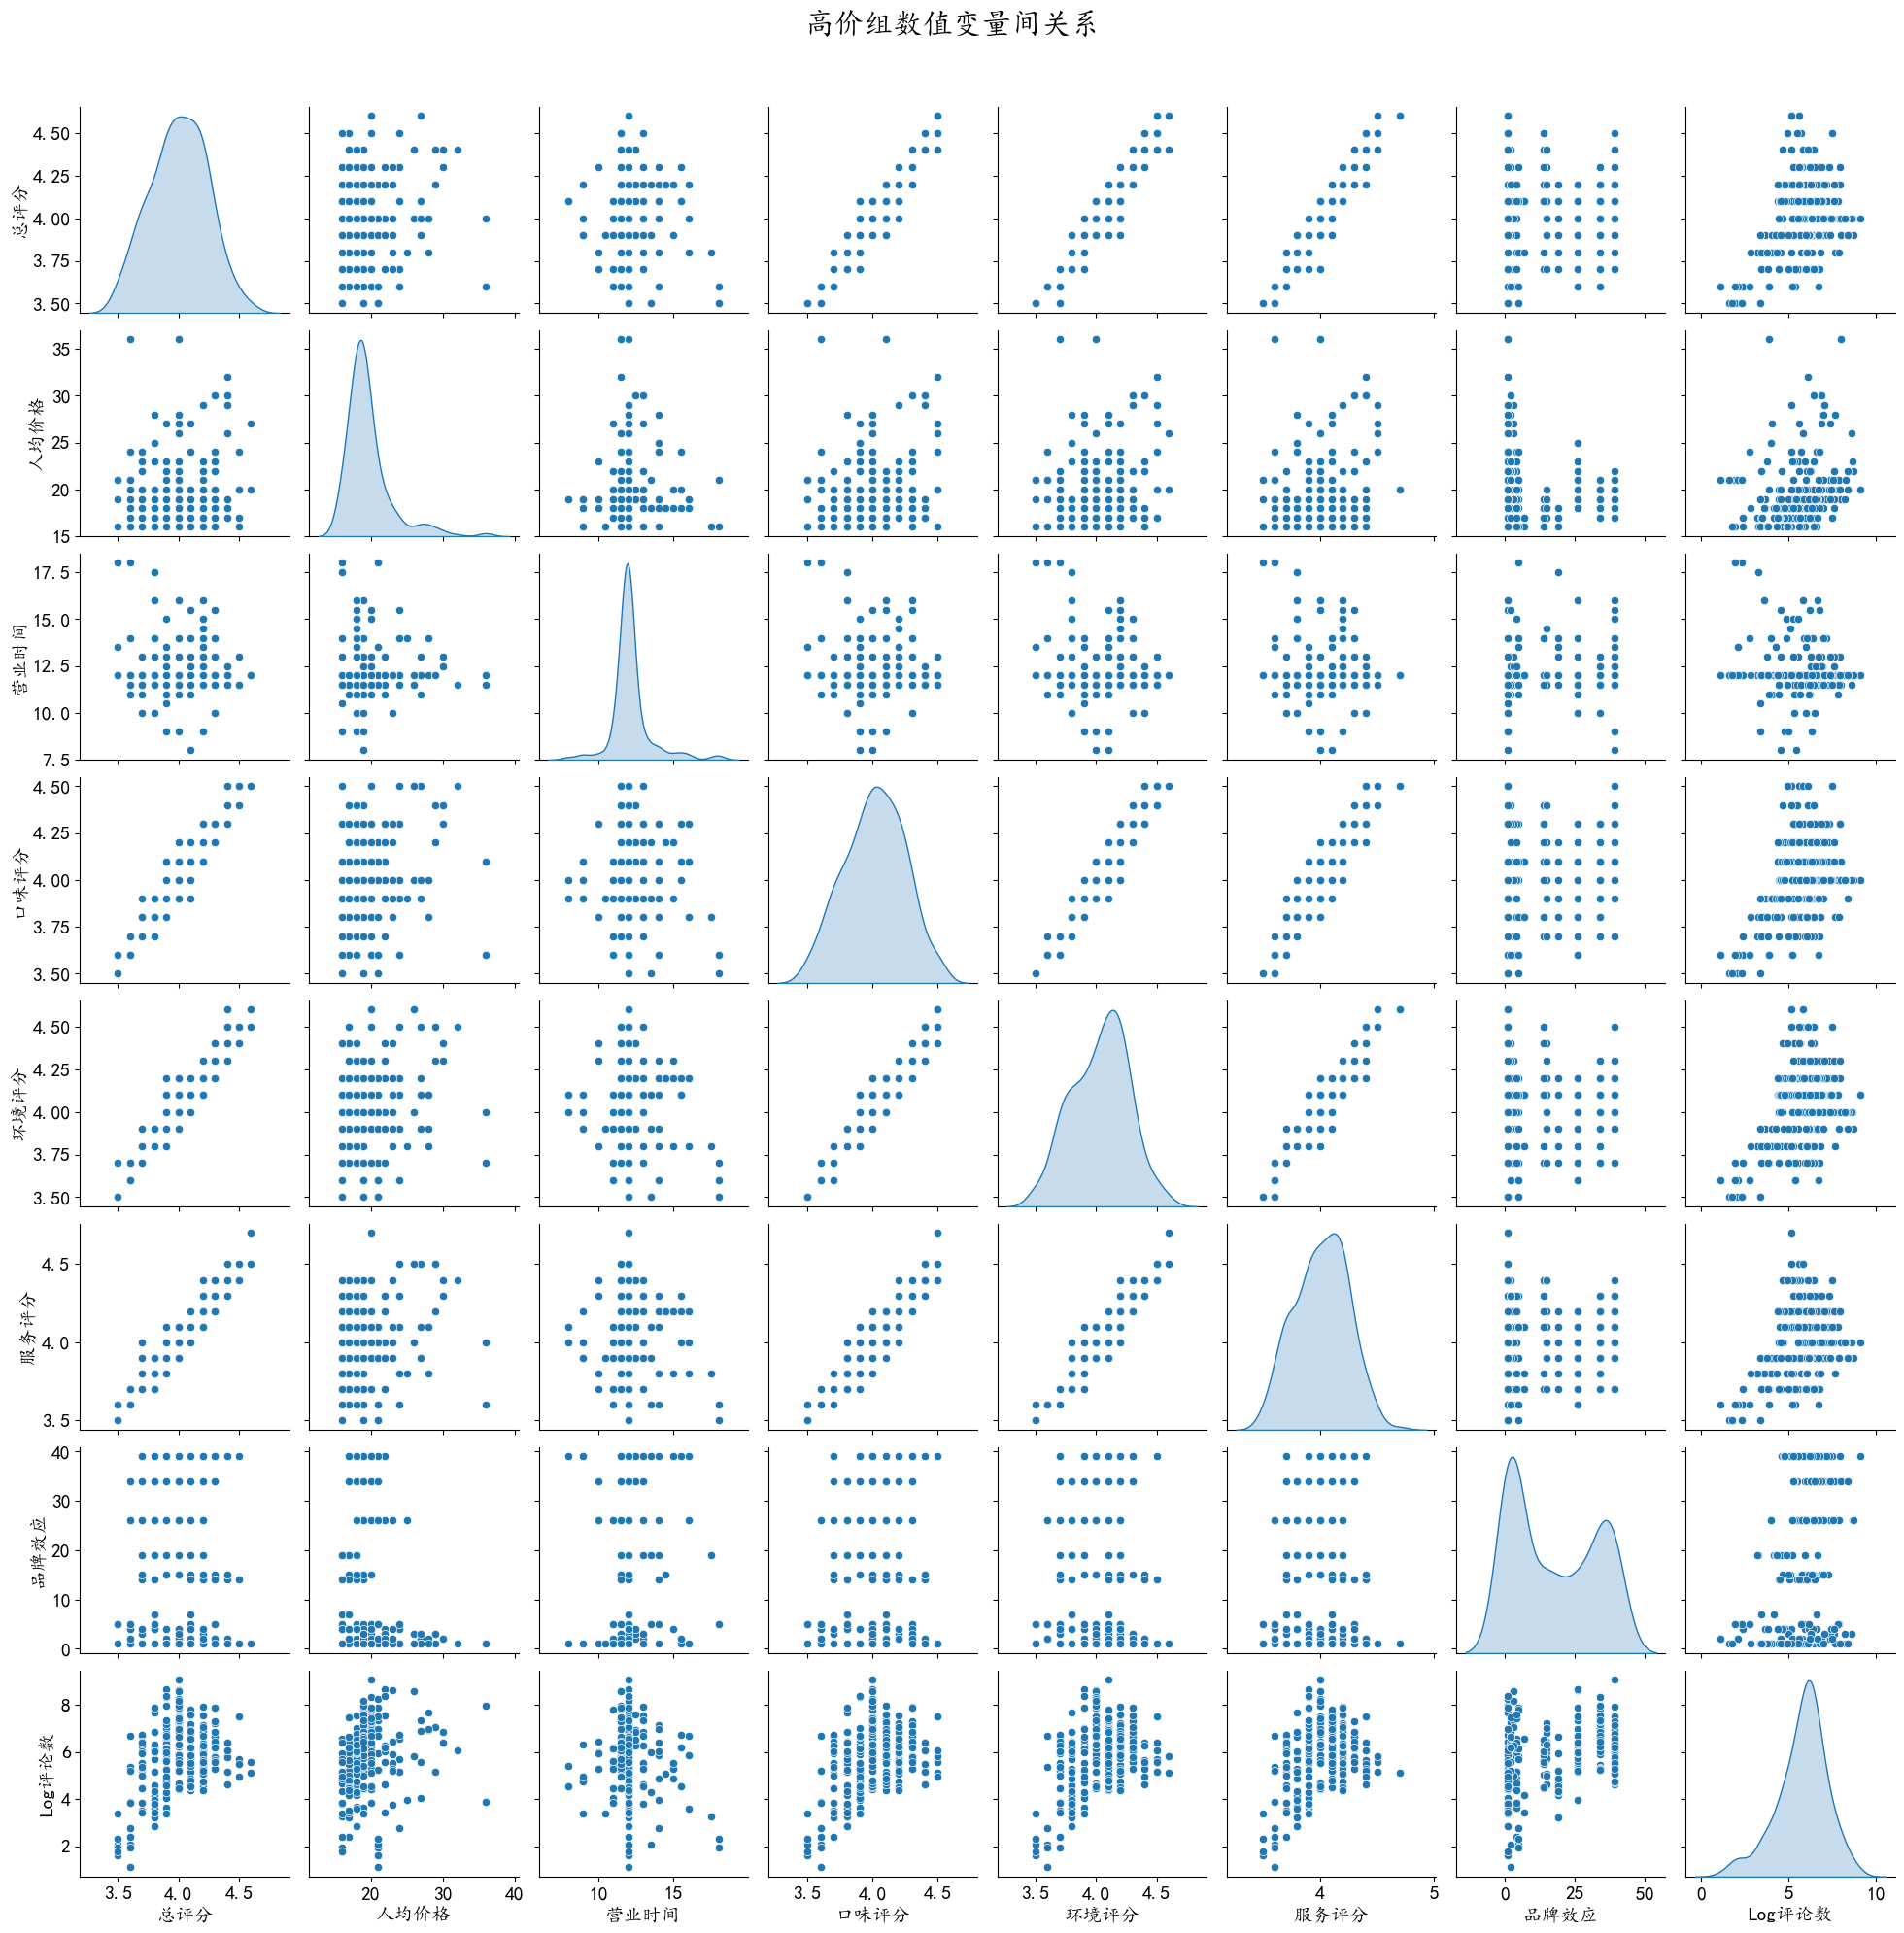

In [174]:

# 对高价组画配对散点图
high_price_mask = data['HierCluster'] == '高人均价格'
data_high_price = data[high_price_mask]
grid_low = sns.pairplot(data[high_price_mask][numeric_cols], diag_kind='kde', markers='o')
grid_low.fig.suptitle("高价组数值变量间关系", fontsize=22, y=1.00)
plt.subplots_adjust(top=0.95)
plt.savefig(os.path.join(output, "高价组数值变量间关系.png"), dpi=300, bbox_inches='tight')
plt.show()

In [175]:
# 对聚类高价组进行回归
x_high = data_high_price[['人均价格','营业时间','总评分','是否连锁_连锁',
                        '有无团购套餐_有团购','主营品类_奶茶', '主营品类_果茶', 
                        '主营品类_纯茶', '主营品类_风味牛奶', '主营品类_甜品/小吃',
                        '品牌效应']]
x_high['营业时间_平方'] = x_high['营业时间'] ** 2
x_high = sm.add_constant(x_high)
x_high = x_high.astype(float)
y_high = data_high_price['Log评论数']

# 回归
model_high_price = sm.OLS(y_high, x_high).fit()
print(model_high_price.summary())

                            OLS Regression Results                            
Dep. Variable:                 Log评论数   R-squared:                       0.378
Model:                            OLS   Adj. R-squared:                  0.346
Method:                 Least Squares   F-statistic:                     11.52
Date:                  周三, 21 5月 2025   Prob (F-statistic):           5.43e-18
Time:                        20:21:44   Log-Likelihood:                -369.43
No. Observations:                 240   AIC:                             764.9
Df Residuals:                     227   BIC:                             810.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -13.1204      3.279     -4.002      0.0

C:\Users\21515\AppData\Local\Temp\ipykernel_38224\144450256.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_high['营业时间_平方'] = x_high['营业时间'] ** 2


上海基准回归

In [ ]:
# 哑变量化
dummies_chain_sh = pd.get_dummies(data_sh['是否连锁'], prefix='是否连锁')
dummies_chain_sh = dummies_chain_sh.drop('是否连锁_非连锁', axis=1)
dummies_group_sh = pd.get_dummies(data_sh['有无团购套餐'], prefix='有无团购套餐')
dummies_category_sh = pd.get_dummies(data_sh['主营品类'], prefix='主营品类')
dummies_category_sh = dummies_category_sh.drop('主营品类_其他', axis=1)
data_sh = pd.concat([
       data_sh.drop(['是否连锁', '有无团购套餐', '主营品类'], axis=1),
       dummies_chain_sh,
       dummies_group_sh,
       dummies_category_sh
], axis=1)

In [178]:
y_sh = data_sh['Log评论数']
x_sh = data_sh[['人均价格','营业时间','总评分','是否连锁_连锁',
          '有无团购套餐_有团购','主营品类_奶茶', '主营品类_果茶', 
          '主营品类_纯茶', '主营品类_风味牛奶', '主营品类_甜品/小吃',
          '品牌效应']]
x_sh['营业时间_平方'] = x_sh['营业时间'] ** 2
x_sh = sm.add_constant(x_sh)
x_sh = x_sh.astype(float)
model_sh = sm.OLS(y_sh, x_sh).fit()
print(model_sh.summary())

                            OLS Regression Results                            
Dep. Variable:                 Log评论数   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     2.547
Date:                  周三, 21 5月 2025   Prob (F-statistic):            0.00551
Time:                        20:50:42   Log-Likelihood:                -258.97
No. Observations:                 166   AIC:                             541.9
Df Residuals:                     154   BIC:                             579.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.1728      3.898      2.097      0.0

C:\Users\21515\AppData\Local\Temp\ipykernel_38224\421890573.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_sh['营业时间_平方'] = x_sh['营业时间'] ** 2
